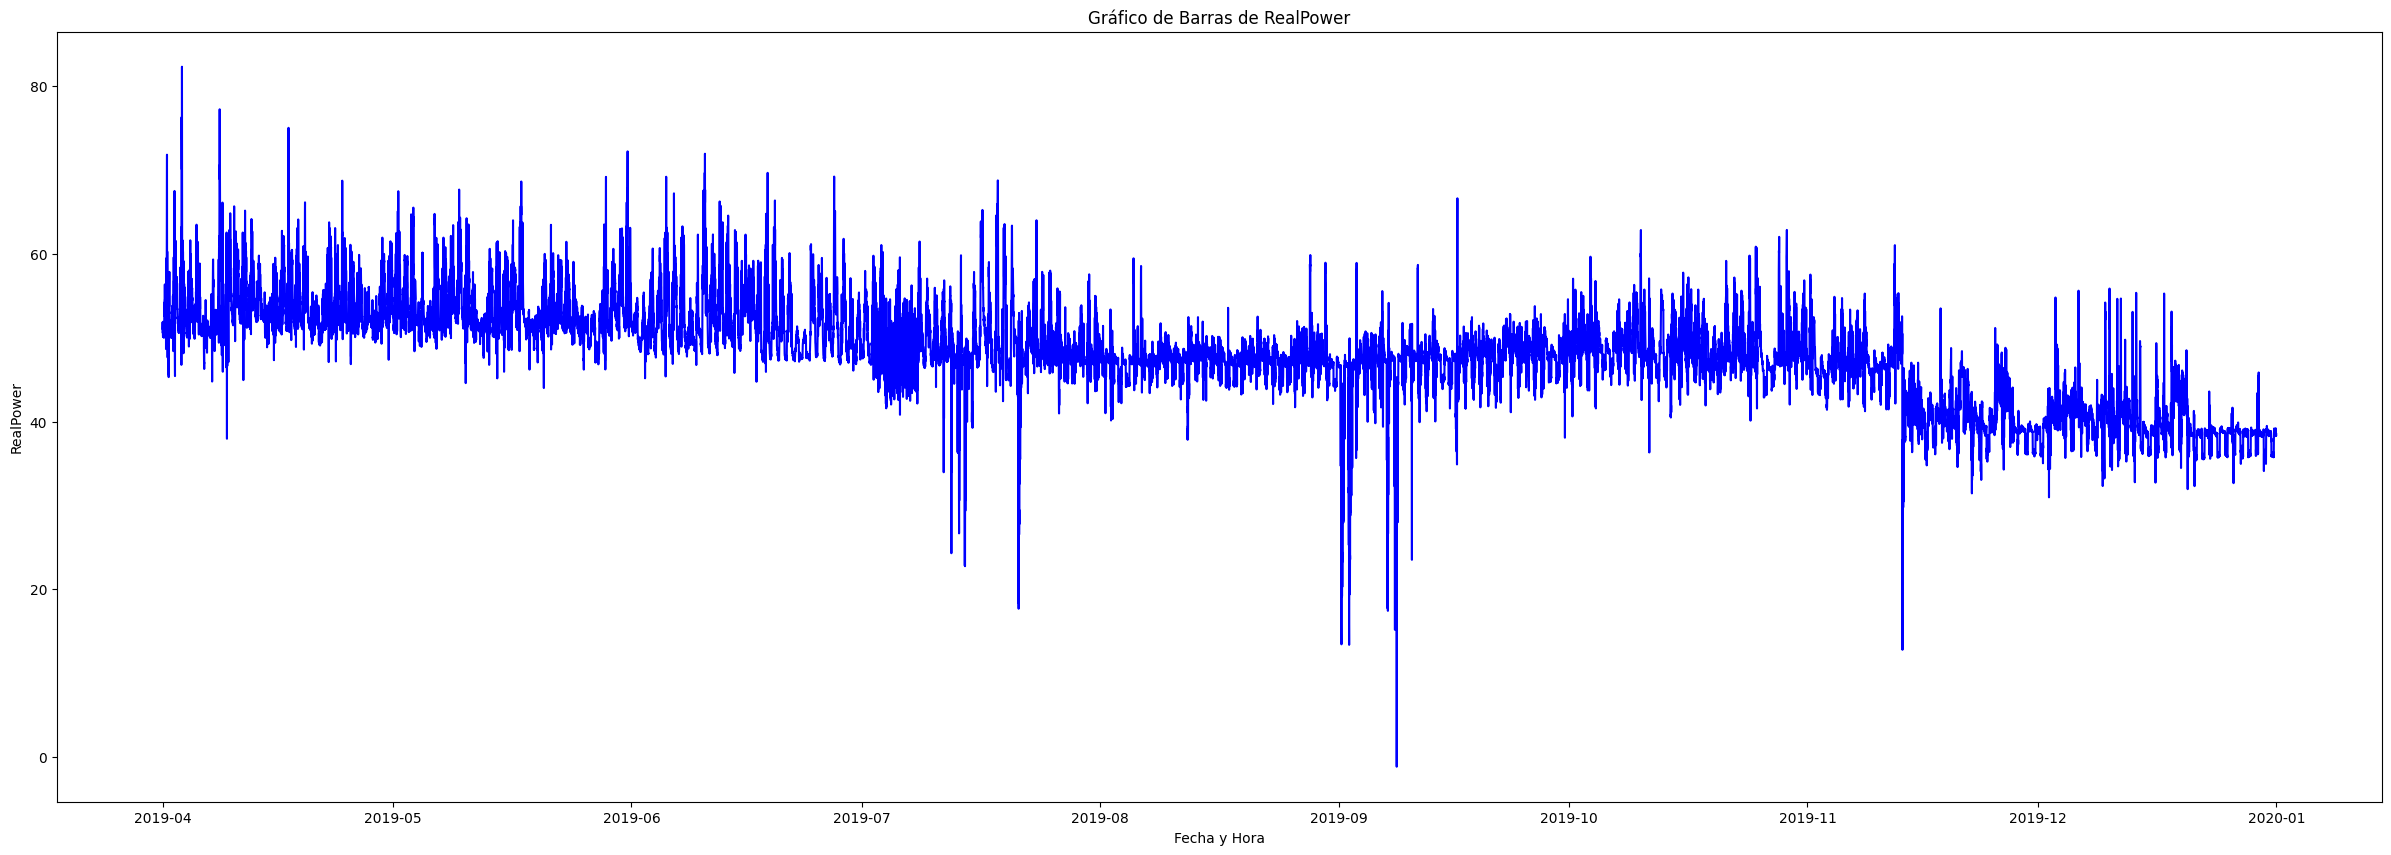

In [460]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data=pd.read_csv("UCSD-Microgrid-Database\Data Files\BuildingLoadWithEV\HopkinsBuilding.csv")

df=pd.DataFrame(data)

df = df.drop(df.index[0]).reset_index(drop=True)


df["DateTime"]=pd.to_datetime(df["DateTime"])

plt.figure(figsize=(30, 10))
plt.plot(df['DateTime'], df['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()


Error absoluto medio: 4.148191798959005
Error cuadrático medio: 31.042050015305566
Raíz cuadrada del error cuadrático medio: 5.571539285987811


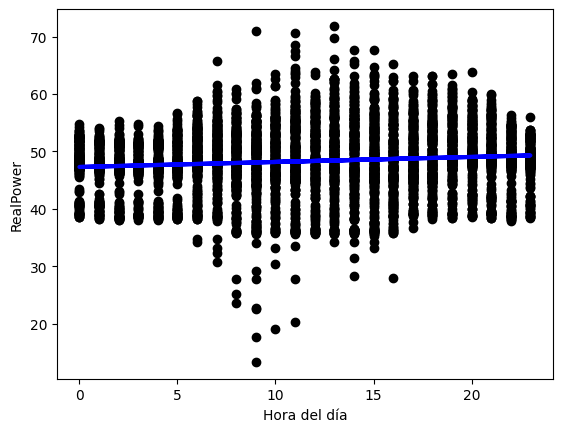

In [461]:

df['Hour'] = df['DateTime'].dt.hour
X = df[['Hour']]
y = df['RealPower']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz cuadrada del error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred, squared=False))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Hora del día')
plt.ylabel('RealPower')
plt.show()

**December Load**

In [462]:
df_2019_dec=pd.DataFrame()

for i in range(len(df)):
    if i <= 2976:
        df_2019_dec = pd.concat([df_2019_dec, df.iloc[[i]]])

df_2019_dec["RealPower"].describe()

count    2977.000000
mean       39.698156
std         2.878141
min        30.974000
25%        38.366000
50%        39.089000
75%        40.950000
max        55.878000
Name: RealPower, dtype: float64

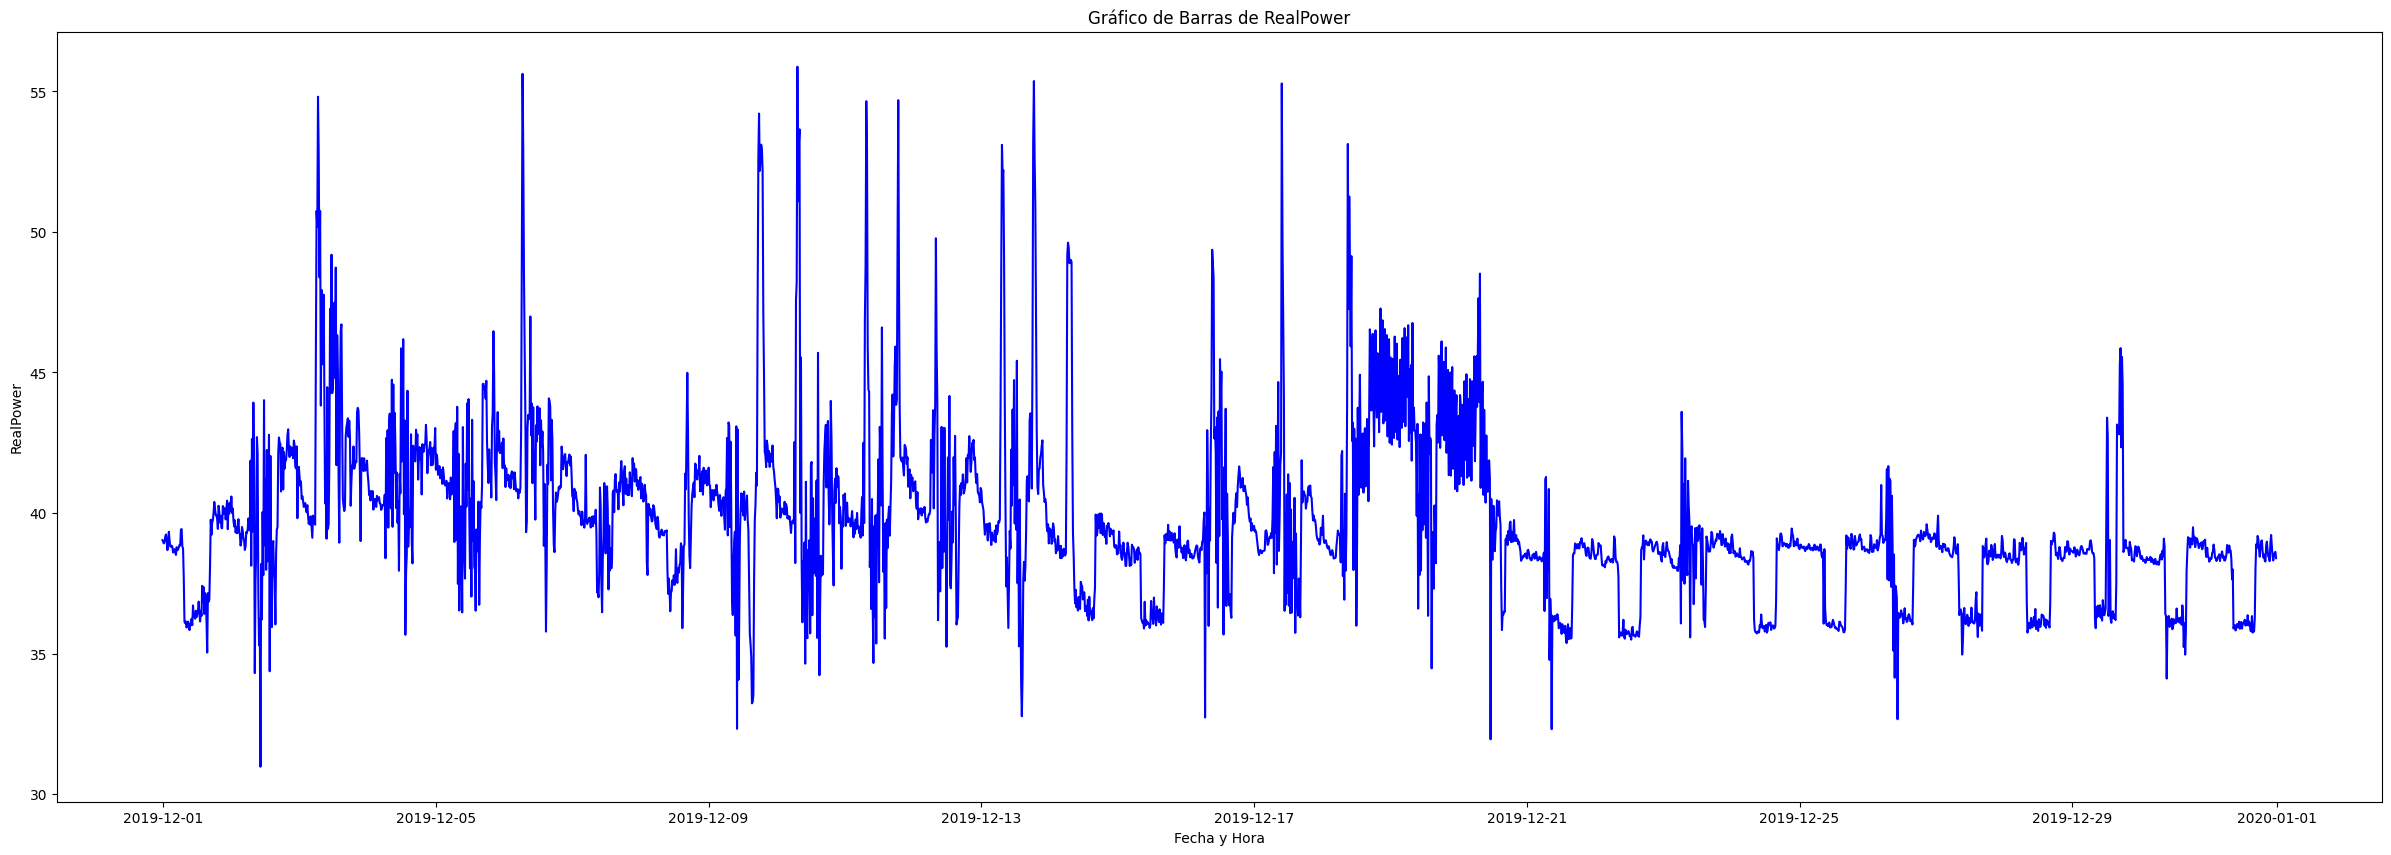

In [463]:
plt.figure(figsize=(30, 10))
plt.plot(df_2019_dec['DateTime'], df_2019_dec['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**Winter break: 14 a inicios de enero**

In [474]:
winter_break=pd.DataFrame()

for i in range(len(df_2019_dec)):
    if i <= 1727:
        winter_break = pd.concat([winter_break, df_2019_dec.iloc[[i]]])

winter_break["RealPower"].describe()

count    1728.000000
mean       38.915449
std         2.522365
min        31.949000
25%        37.842500
50%        38.692000
75%        39.218250
max        55.283000
Name: RealPower, dtype: float64

In [475]:
before_winter_break=pd.DataFrame()

for i in range(len(df_2019_dec)):
    if 1727< i <= 2975:
        before_winter_break = pd.concat([before_winter_break, df_2019_dec.iloc[[i]]])

before_winter_break["RealPower"].describe()

count    1248.000000
mean       40.782434
std         2.988653
min        30.974000
25%        39.383500
50%        40.508000
75%        41.849750
max        55.878000
Name: RealPower, dtype: float64

Día del máximo valor

In [396]:
for i, value in enumerate(df_2019_dec["RealPower"]):
    if value == 55.878000:
        print(df_2019_dec["DateTime"].iloc[i])

2019-12-10 07:15:00


In [397]:
df_2019_dia_min=pd.DataFrame()

for i in range(len(df_2019_dec)):
    if 2015<i<2112:
        df_2019_dia_min = pd.concat([df_2019_dia_min, df.iloc[[i]]])

lista = []

df_2019_dia_min = df_2019_dia_min.reset_index()

for i in range(len(df_2019_dia_min)):
    lista.append(df_2019_dia_min["RealPower"][i])
    if (i + 1) % 4 == 0 and i != 0:
        prom = sum(lista) / 4
        df_2019_dia_min.loc[i - 3:i, "PromedioRealPower"] = prom
        lista = []

df_2019_dia_min


,index,DateTime,RealPower,Hour,PromedioRealPower
0,2016,2019-12-10 23:45:00,40.183,23,40.00400
1,2017,2019-12-10 23:30:00,40.647,23,40.00400
2,2018,2019-12-10 23:15:00,39.509,23,40.00400
3,2019,2019-12-10 23:00:00,39.677,23,40.00400
4,2020,2019-12-10 22:45:00,38.017,22,39.42125
...,...,...,...,...,...
91,2107,2019-12-10 01:00:00,40.585,1,40.15475
92,2108,2019-12-10 00:45:00,40.387,0,40.47975
93,2109,2019-12-10 00:30:00,40.851,0,40.47975
94,2110,2019-12-10 00:15:00,40.868,0,40.47975


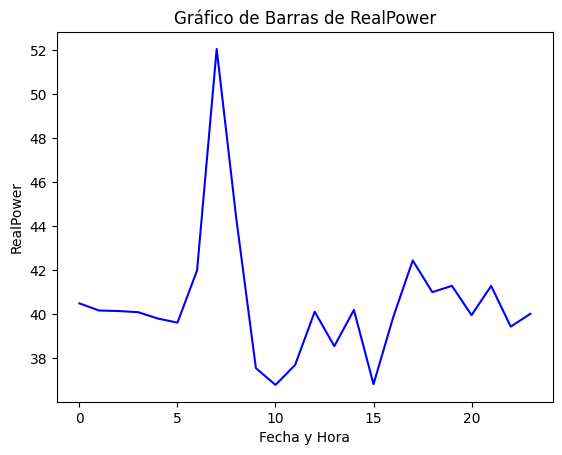

In [398]:
df_2019_dia_min['hora'] = df_2019_dia_min['DateTime'].dt.hour

plt.plot(df_2019_dia_min['hora'], df_2019_dia_min['PromedioRealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

Se observa un comportamiento fluctuante, se presentan picos de carga entre las 7am a 8am. Luego, del pico de carga, se tiene un comportamiento variante e igualmente elevado con respecto otros días del mes, en el cual se tienen cargas entre 36 a 38. 

Día del mínimo valor

In [399]:
for i, value in enumerate(df_2019_dec["RealPower"]):
    if value == 30.974000:
        print(df_2019_dec["DateTime"].iloc[i])

2019-12-02 10:15:00


In [400]:

df_2019_dia=pd.DataFrame()

for i in range(len(df_2019_dec)):
    if  2783<i<2880:
        df_2019_dia = pd.concat([df_2019_dia, df_2019_dec.iloc[[i]]])

df_2019_dia = df_2019_dia.reset_index()

lista = []
for i in range(len(df_2019_dia)):
    lista.append(df_2019_dia["RealPower"][i])
    if (i + 1) % 4 == 0 and i != 0:
        prom = sum(lista) / 4
        df_2019_dia.loc[i - 3:i, "PromedioRealPower"] = prom
        lista = []

df_2019_dia


,index,DateTime,RealPower,Hour,PromedioRealPower
0,2784,2019-12-02 23:45:00,41.646,23,41.34825
1,2785,2019-12-02 23:30:00,41.563,23,41.34825
2,2786,2019-12-02 23:15:00,39.815,23,41.34825
3,2787,2019-12-02 23:00:00,42.369,23,41.34825
4,2788,2019-12-02 22:45:00,41.584,22,42.06000
...,...,...,...,...,...
91,2875,2019-12-02 01:00:00,39.521,1,39.51375
92,2876,2019-12-02 00:45:00,39.721,0,40.11675
93,2877,2019-12-02 00:30:00,40.160,0,40.11675
94,2878,2019-12-02 00:15:00,39.998,0,40.11675


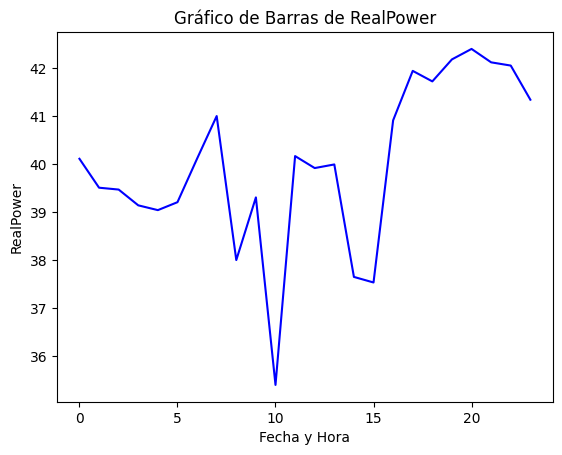

In [401]:
df_2019_dia['hora'] = df_2019_dia['DateTime'].dt.hour

plt.plot(df_2019_dia['hora'], df_2019_dia['PromedioRealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**November Load**

In [402]:
df_2019_nov=pd.DataFrame()

for i in range(len(df)):
    if 2975< i <= 5855:
        df_2019_nov = pd.concat([df_2019_nov, df.iloc[[i]]])

df_2019_nov["RealPower"].describe()

count    2880.000000
mean       43.320121
std         4.379277
min        12.788000
25%        39.650000
50%        42.993000
75%        46.735000
max        61.052000
Name: RealPower, dtype: float64

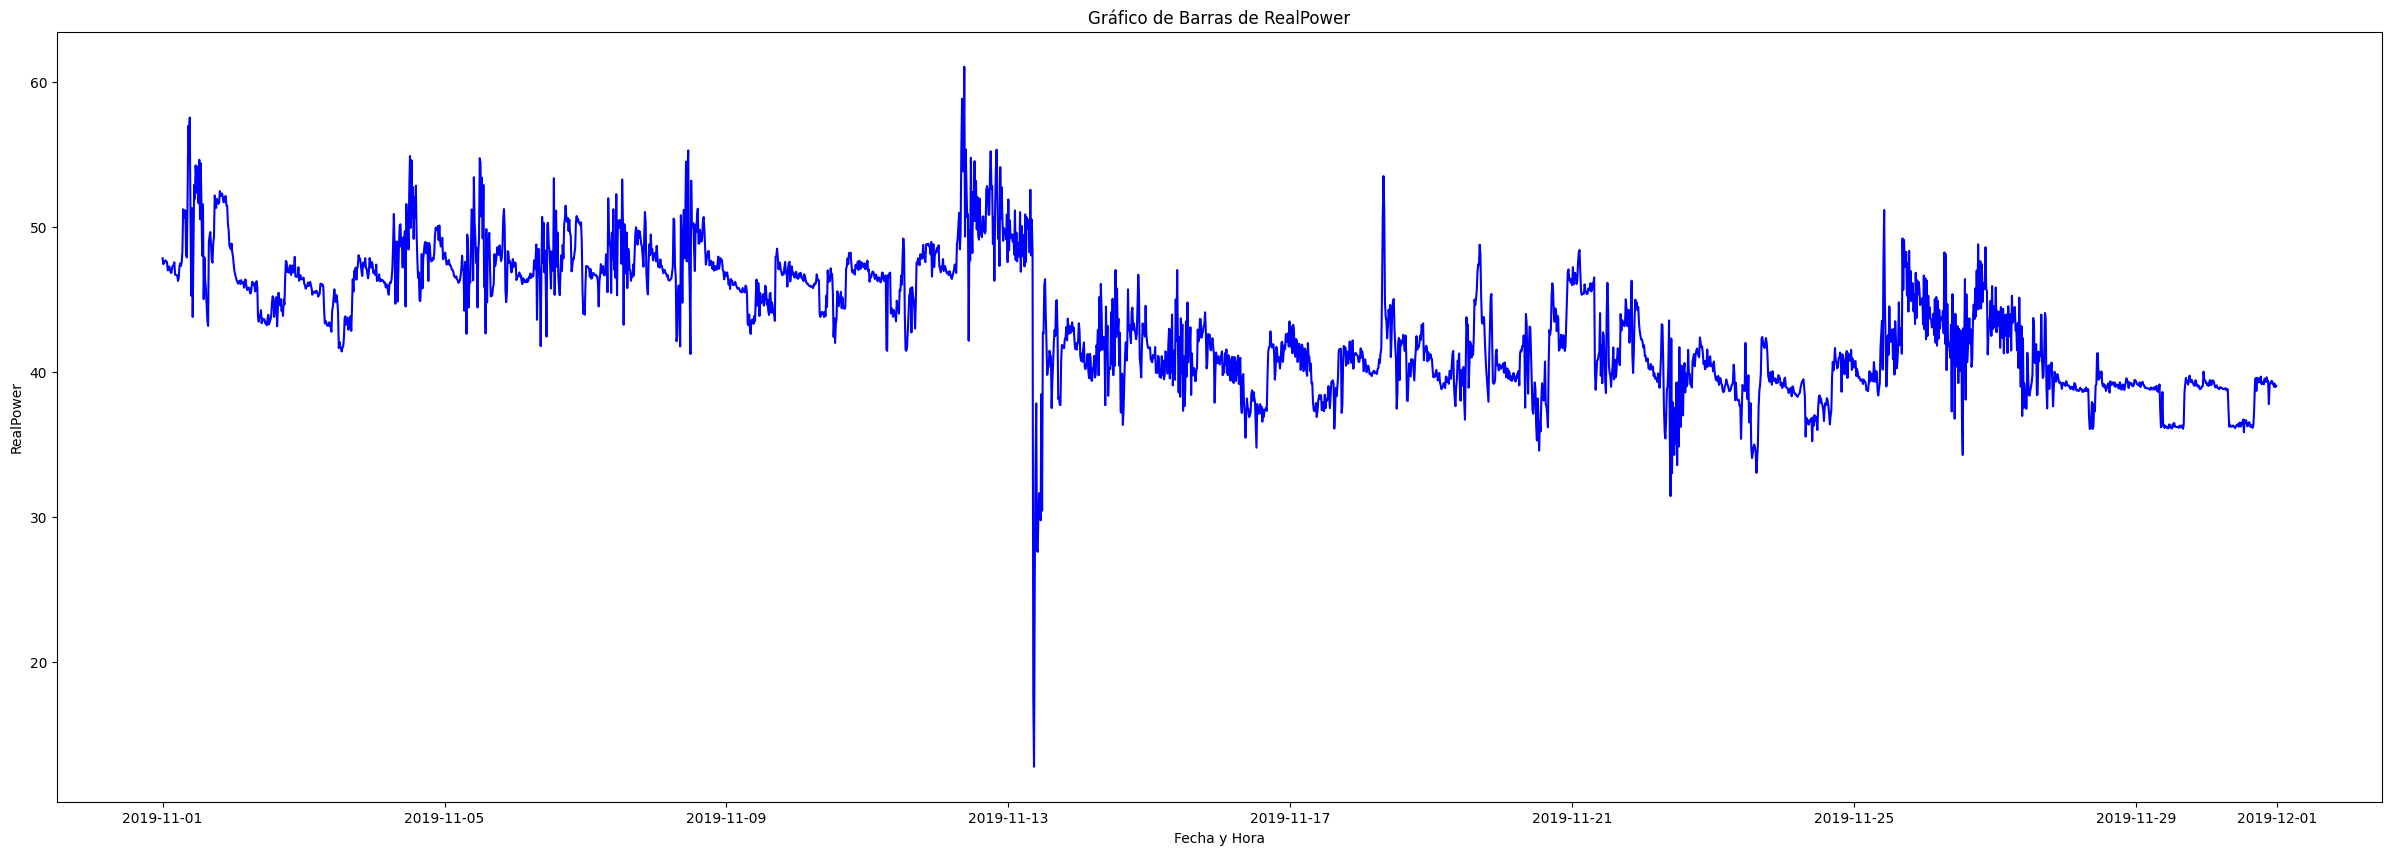

In [403]:
df_2019_nov["DateTime"]=pd.to_datetime(df_2019_nov["DateTime"])

plt.figure(figsize=(30, 10))

plt.plot(df_2019_nov['DateTime'], df_2019_nov['RealPower'], color='blue')

plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

Se observa valores atípicos.

**Mínimo valor**

In [404]:
for i, value in enumerate(df_2019_nov["RealPower"]):
    if value == 12.788000:
        print(df_2019_nov["DateTime"].iloc[i])

2019-11-13 08:45:00


In [405]:
df_2019_nov_min=pd.DataFrame()

for i in range(len(df_2019_nov)):
    if 1631<i<1728:
        df_2019_nov_min = pd.concat([df_2019_nov_min, df_2019_nov.iloc[[i]]])

df_2019_nov_min = df_2019_nov_min.reset_index()

lista = []
for i in range(len(df_2019_nov_min)):
    lista.append(df_2019_nov_min["RealPower"][i])
    if (i + 1) % 4 == 0 and i != 0:
        prom = sum(lista) / 4
        df_2019_nov_min.loc[i - 3:i, "PromedioRealPower"] = prom
        lista = []

df_2019_nov_min


,index,DateTime,RealPower,Hour,PromedioRealPower
0,4608,2019-11-13 23:45:00,42.041,23,41.88425
1,4609,2019-11-13 23:30:00,41.947,23,41.88425
2,4610,2019-11-13 23:15:00,41.541,23,41.88425
3,4611,2019-11-13 23:00:00,42.008,23,41.88425
4,4612,2019-11-13 22:45:00,41.594,22,42.43900
...,...,...,...,...,...
91,4699,2019-11-13 01:00:00,49.237,1,49.29550
92,4700,2019-11-13 00:45:00,49.323,0,50.01975
93,4701,2019-11-13 00:30:00,50.465,0,50.01975
94,4702,2019-11-13 00:15:00,48.390,0,50.01975


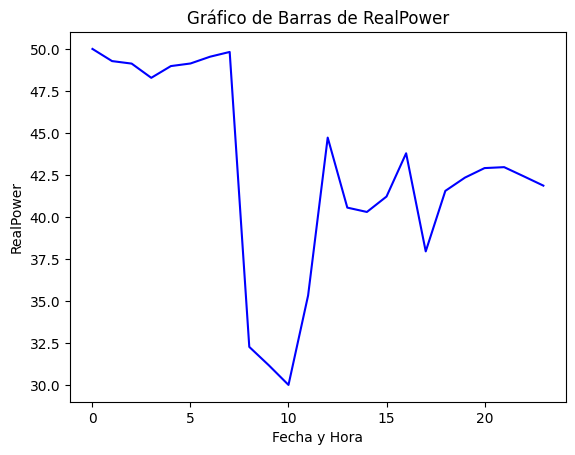

In [406]:
df_2019_nov_min['hora'] = df_2019_nov_min['DateTime'].dt.hour

plt.plot(df_2019_nov_min['hora'], df_2019_nov_min['PromedioRealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**July**

In [407]:
df_2019_july=pd.DataFrame()

for i in range(len(df)):
    if 14687< i <= 17663:
        df_2019_july = pd.concat([df_2019_july, df.iloc[[i]]])

df_2019_july["RealPower"].describe()

count    2976.000000
mean       49.208296
std         4.325597
min        17.686000
25%        47.188750
50%        48.583000
75%        51.006000
max        68.777000
Name: RealPower, dtype: float64

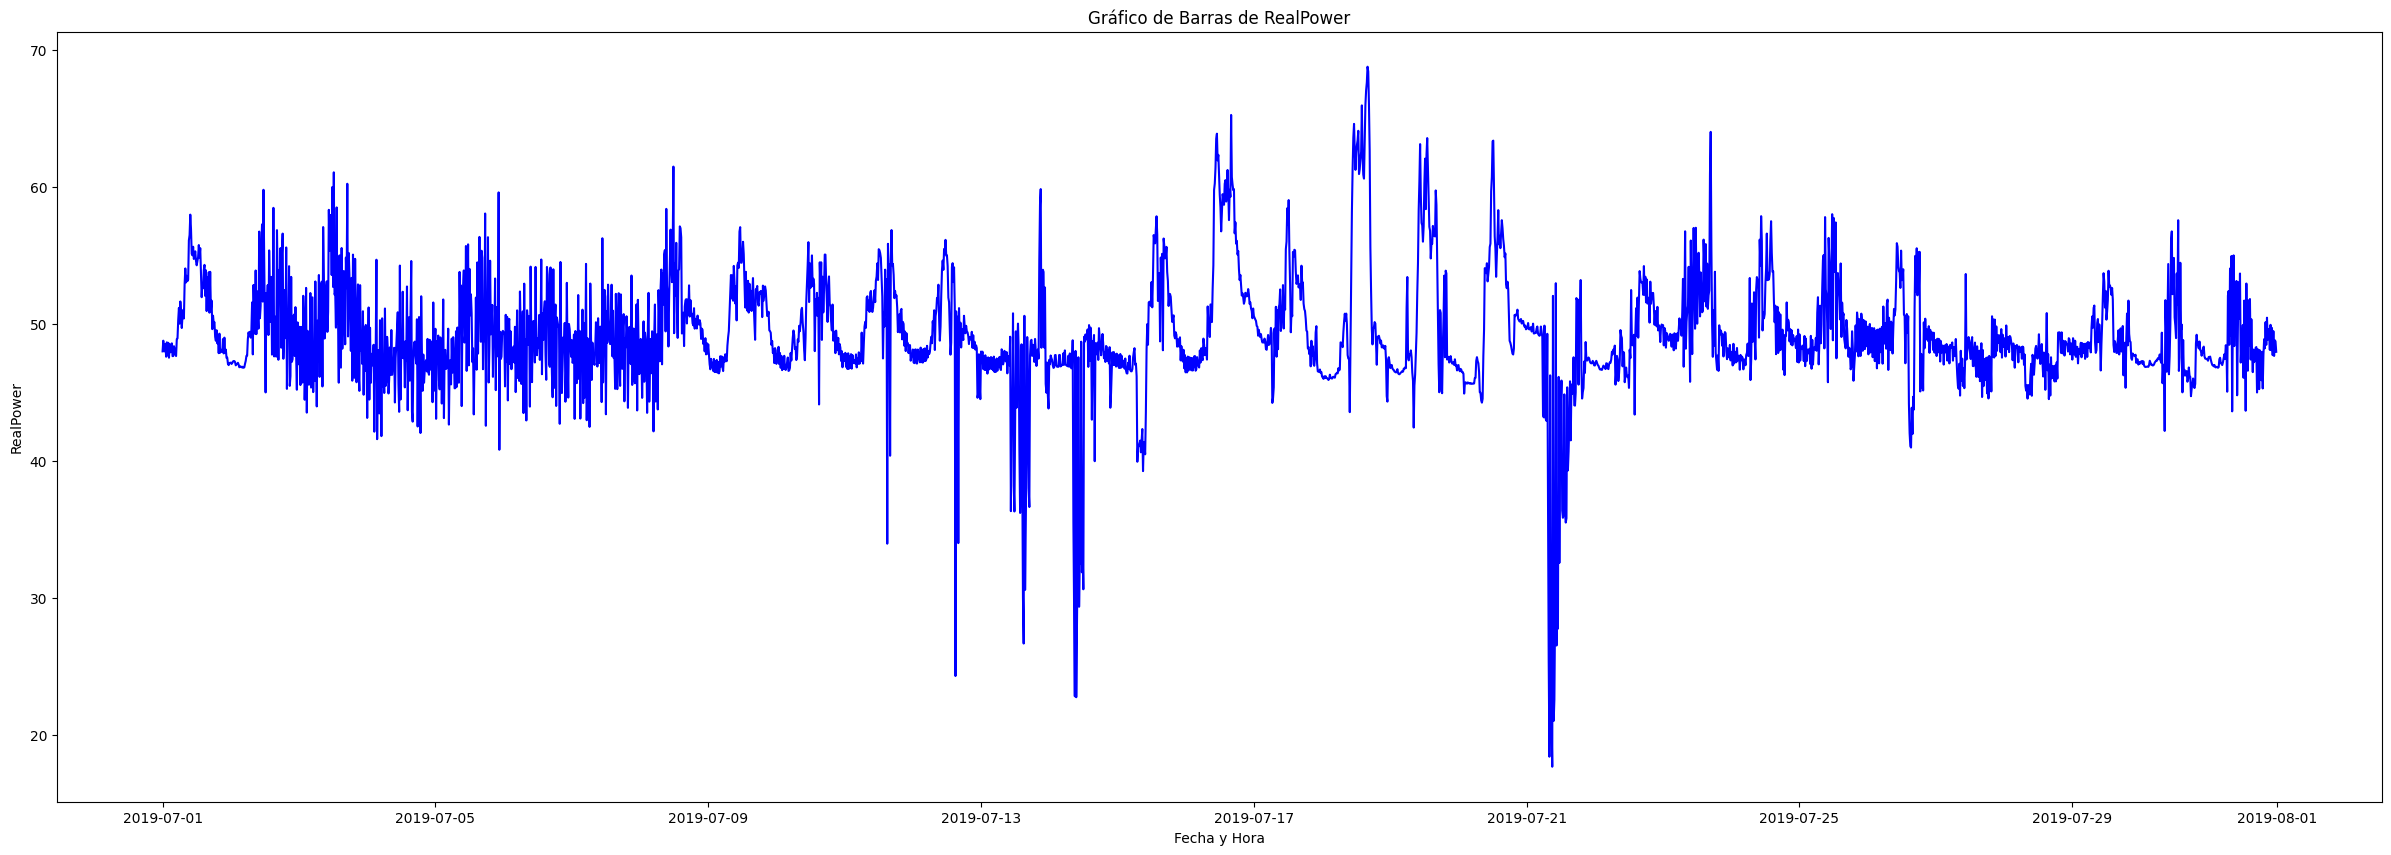

In [408]:
plt.figure(figsize=(30, 10))
plt.plot(df_2019_july['DateTime'], df_2019_july['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**Días Atípicos**

In [409]:
for i, value in enumerate(df_2019_july["RealPower"]): 
    if value < 25:
        print(df_2019_july["DateTime"].iloc[i])

2019-07-21 09:45:00
2019-07-21 09:30:00
2019-07-21 09:00:00
2019-07-21 08:45:00
2019-07-21 08:30:00
2019-07-21 08:00:00
2019-07-14 09:30:00
2019-07-14 09:00:00
2019-07-12 15:00:00


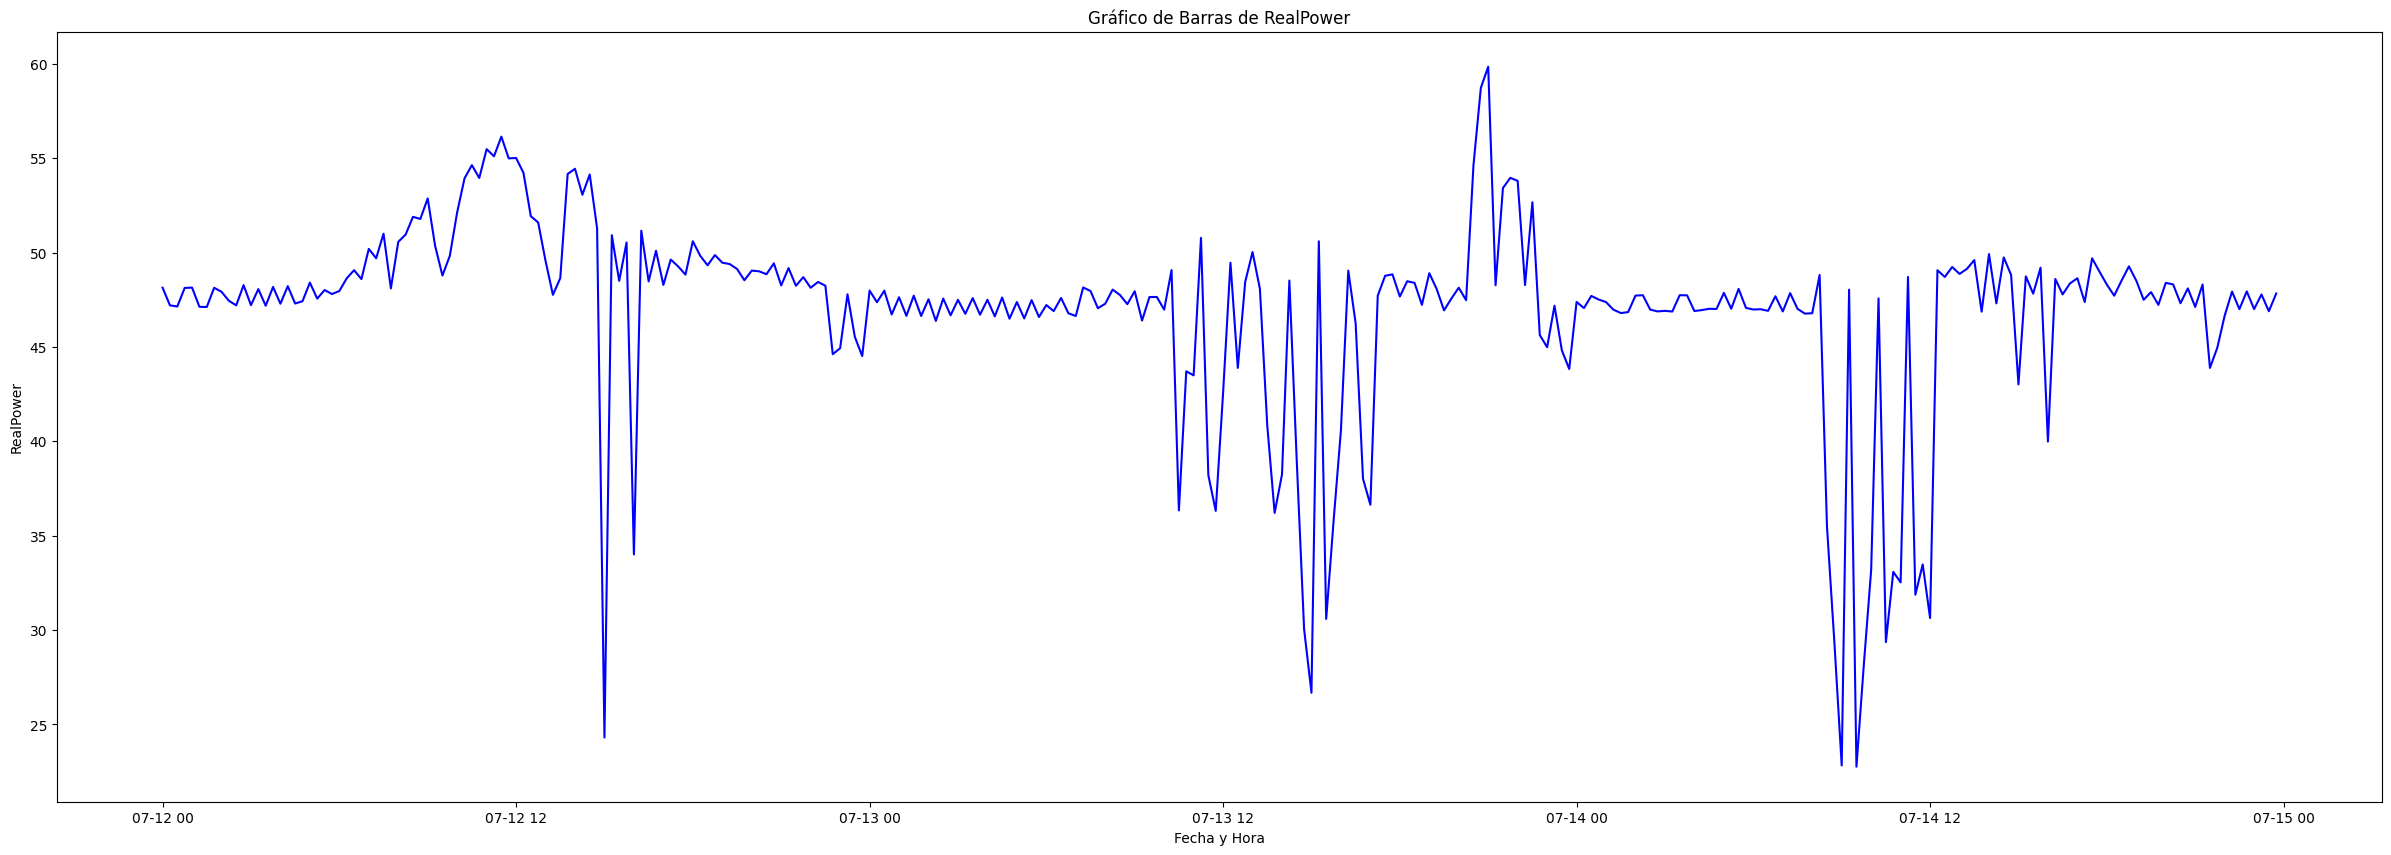

In [410]:
df_2019_july_min=pd.DataFrame()

for i in range(len(df_2019_july)):
    if 1631< i <= 1919:
        df_2019_july_min = pd.concat([df_2019_july_min, df_2019_july.iloc[[i]]])


plt.figure(figsize=(30, 10))
plt.plot(df_2019_july_min['DateTime'], df_2019_july_min['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**August**

In [411]:
df_2019_aug=pd.DataFrame()

for i in range(len(df)):
    if 11711< i <= 14687:
        df_2019_aug = pd.concat([df_2019_aug, df.iloc[[i]]])

df_2019_aug["RealPower"].describe()

count    2976.000000
mean       47.245299
std         1.833556
min        37.858000
25%        46.500250
50%        47.297500
75%        48.056500
max        59.874000
Name: RealPower, dtype: float64

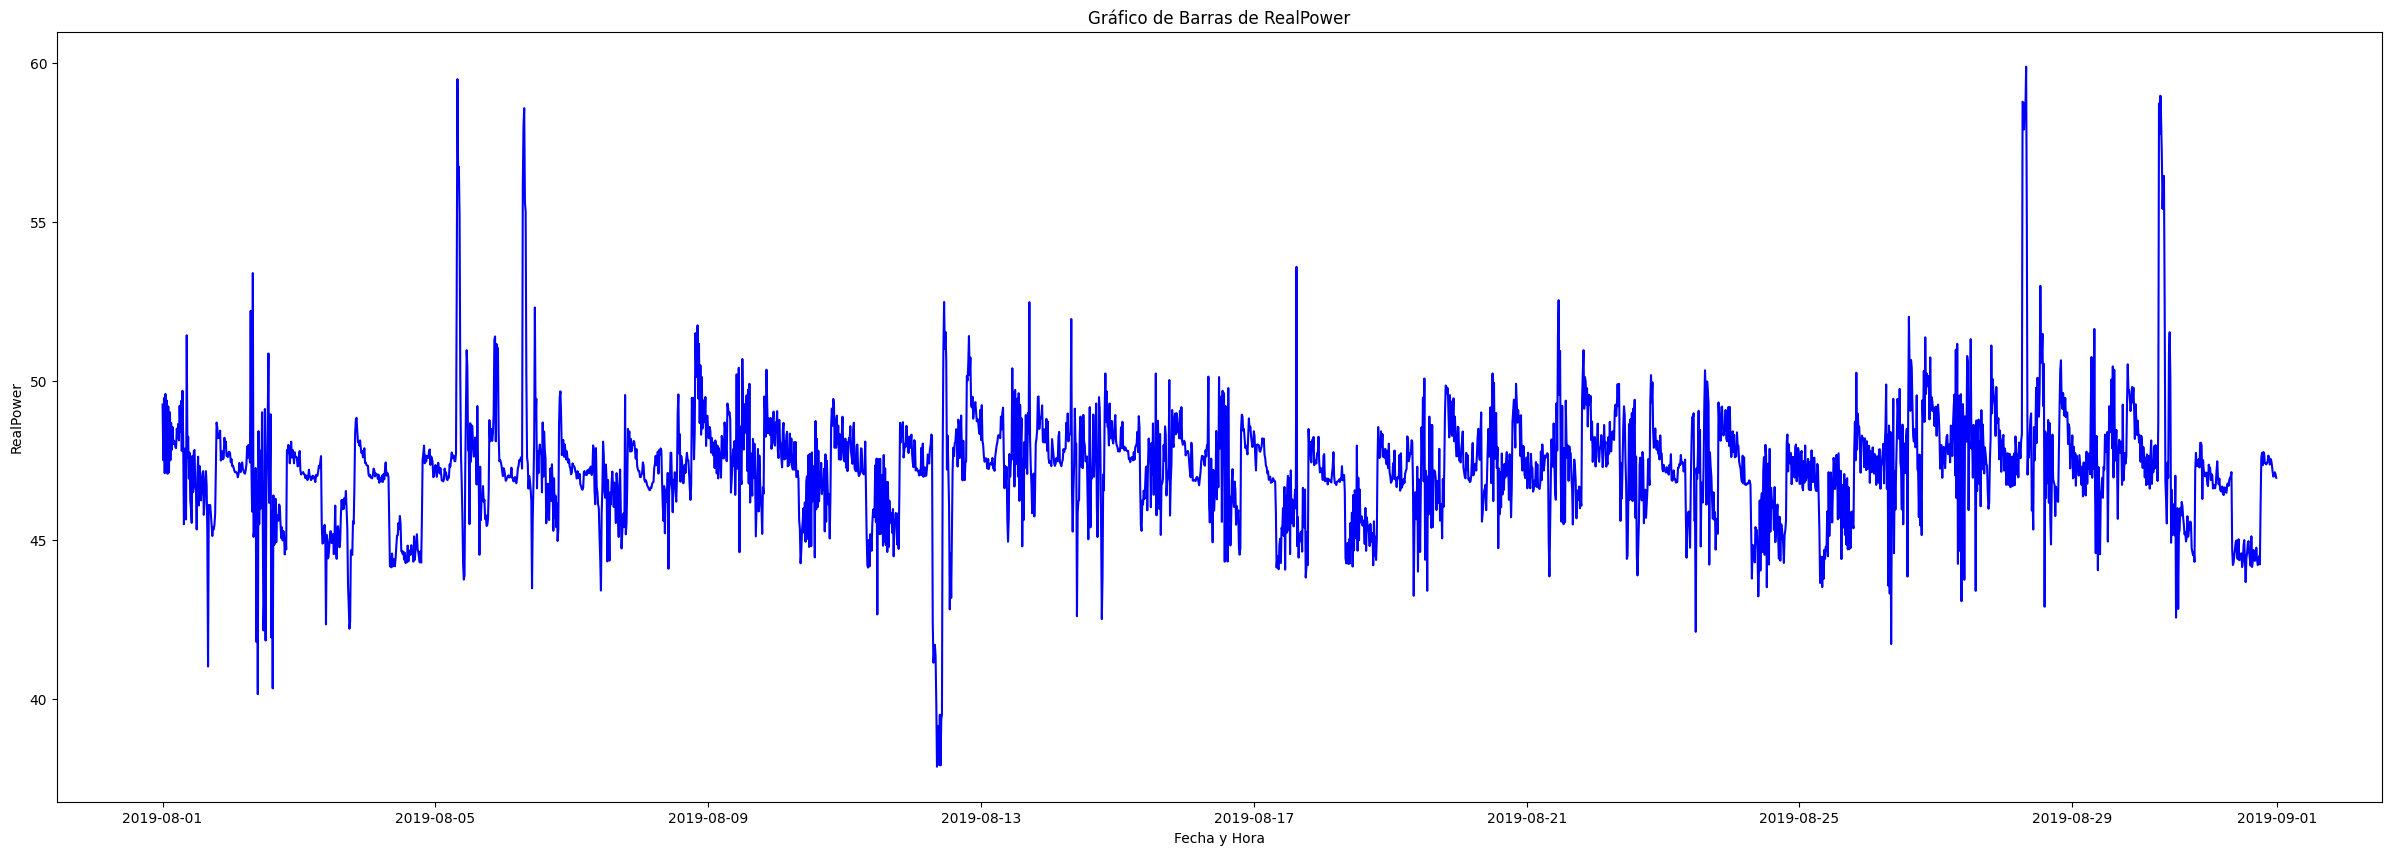

In [412]:
plt.figure(figsize=(30, 10))
plt.plot(df_2019_aug['DateTime'], df_2019_aug['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**September**

In [413]:
df_2019_sep=pd.DataFrame()

for i in range(len(df)):
    if 8831< i <= 11711:
        df_2019_sep = pd.concat([df_2019_sep, df.iloc[[i]]])

df_2019_sep["RealPower"].describe()


count    2880.000000
mean       46.768303
std         4.402259
min        -1.161000
25%        46.182500
50%        47.472000
75%        48.515250
max        66.642000
Name: RealPower, dtype: float64

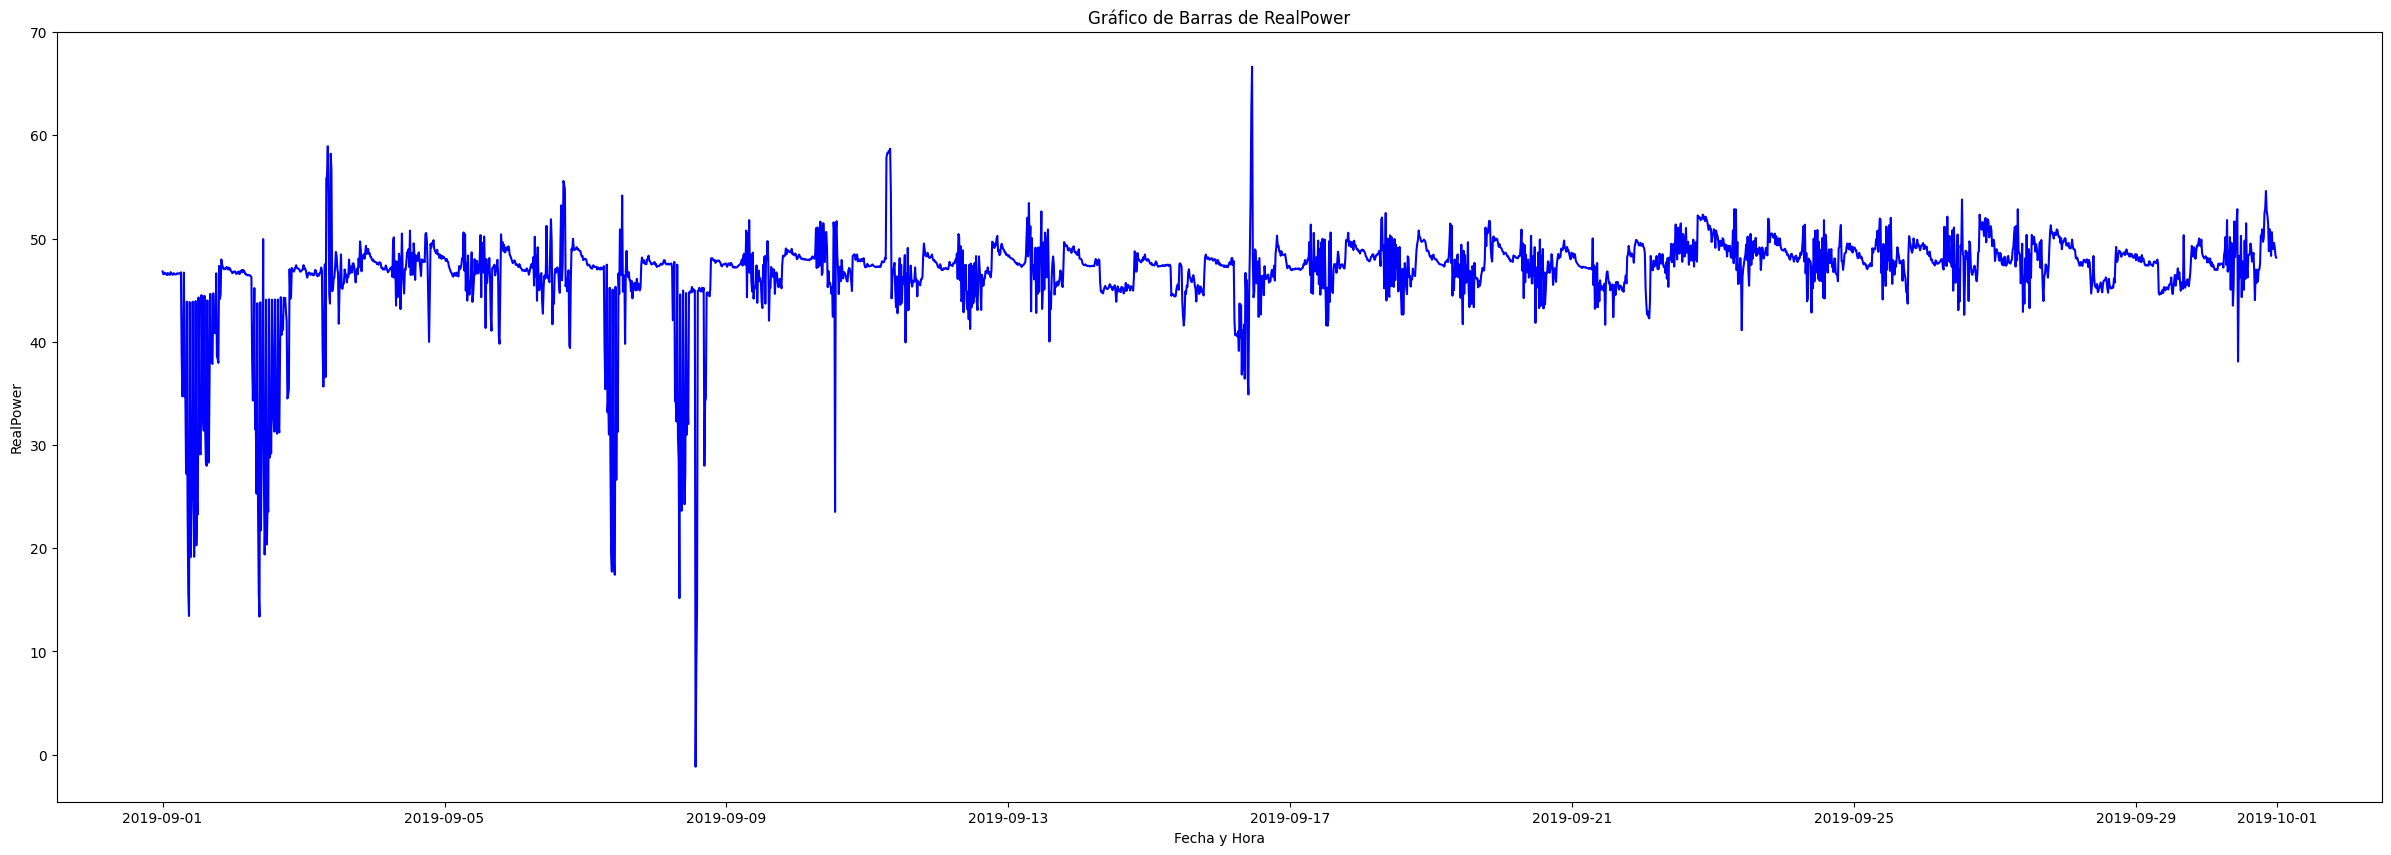

In [414]:
plt.figure(figsize=(30, 10))
plt.plot(df_2019_sep['DateTime'], df_2019_sep['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**Días atípicos**

In [415]:
for i, value in enumerate(df_2019_sep["RealPower"]): 
    if value < 25:
        print(df_2019_sep["DateTime"].iloc[i])

2019-09-10 13:00:00
2019-09-08 14:00:00
2019-09-08 13:45:00
2019-09-08 13:30:00
2019-09-08 09:45:00
2019-09-08 08:45:00
2019-09-08 08:00:00
2019-09-07 10:00:00
2019-09-07 09:45:00
2019-09-07 09:30:00
2019-09-07 09:00:00
2019-09-07 08:45:00
2019-09-02 12:00:00
2019-09-02 11:45:00
2019-09-02 11:30:00
2019-09-02 11:00:00
2019-09-02 10:45:00
2019-09-02 09:30:00
2019-09-02 09:00:00
2019-09-02 08:45:00
2019-09-02 08:30:00
2019-09-01 12:00:00
2019-09-01 11:45:00
2019-09-01 11:30:00
2019-09-01 11:00:00
2019-09-01 10:45:00
2019-09-01 10:30:00
2019-09-01 09:45:00
2019-09-01 09:30:00
2019-09-01 09:00:00
2019-09-01 08:45:00
2019-09-01 08:30:00


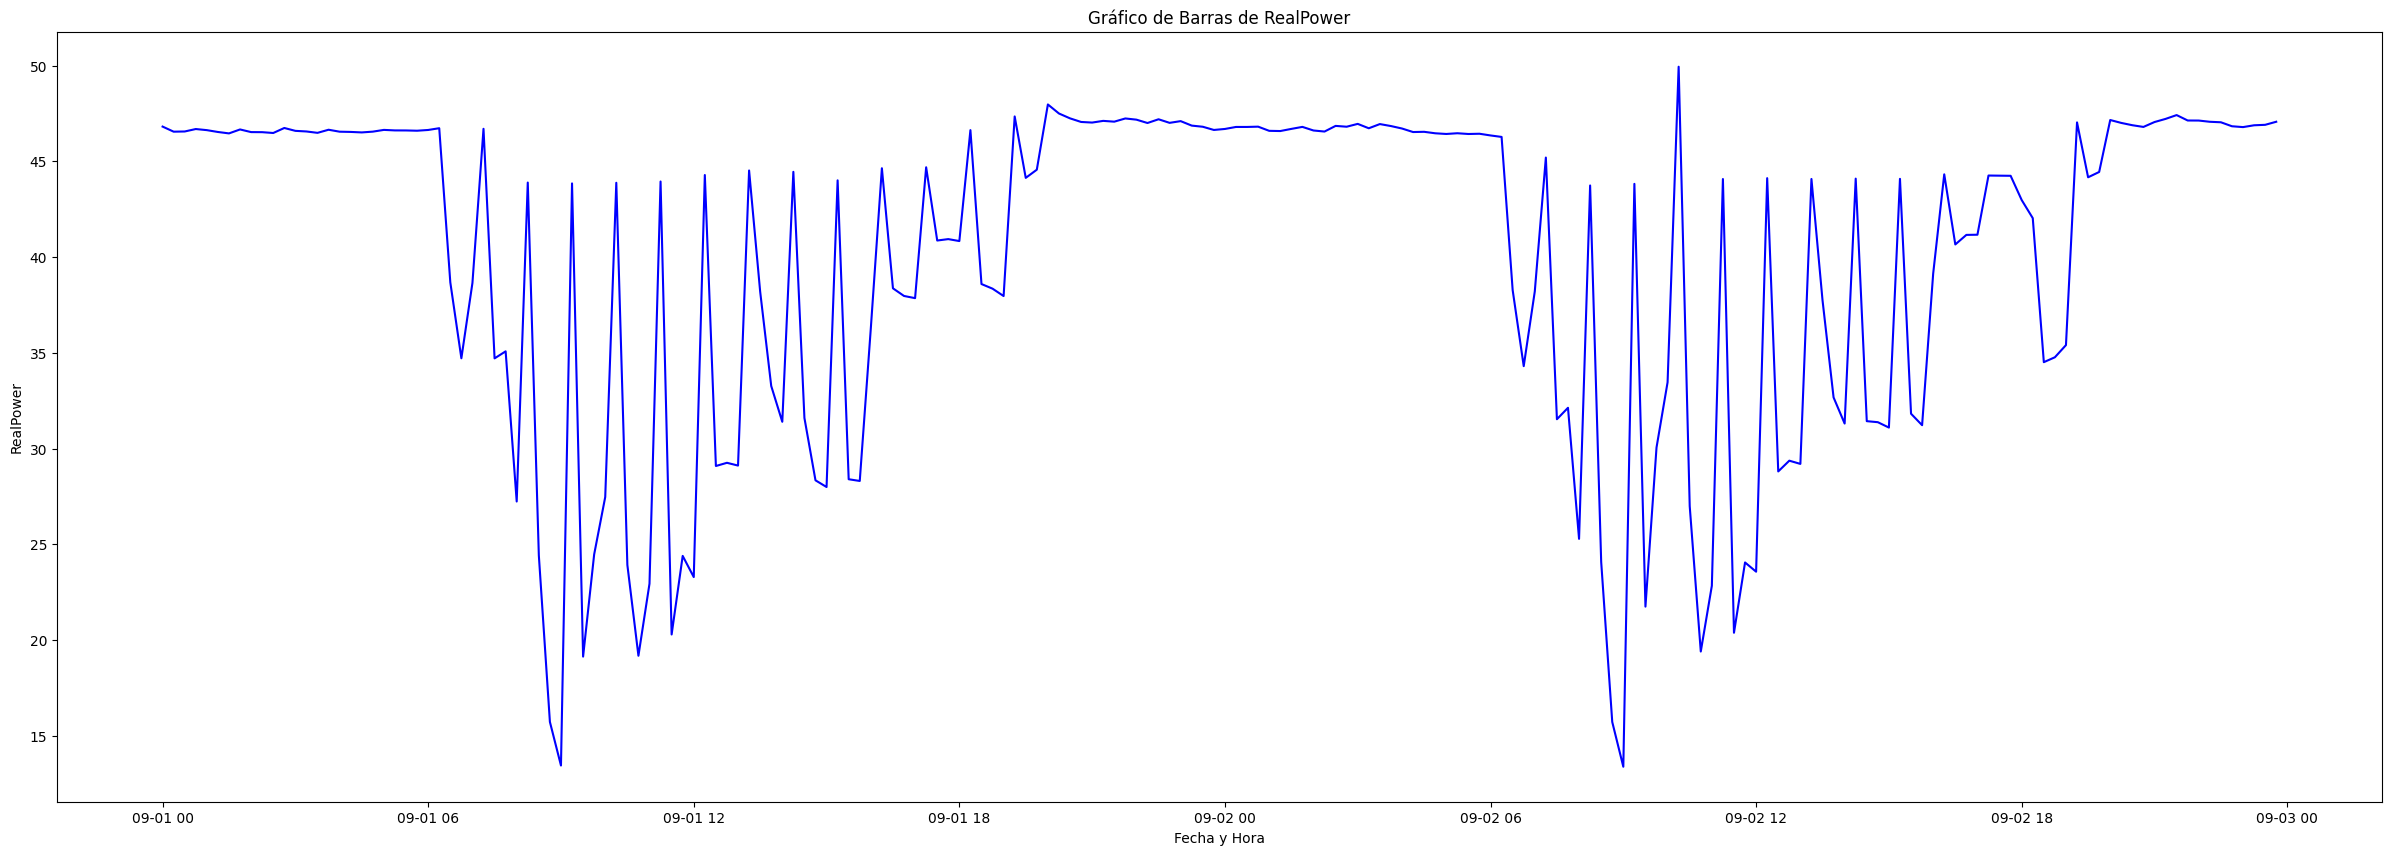

In [416]:
df_2019_sep_min=pd.DataFrame()

for i in range(len(df_2019_sep)):
    if 2687< i <= 2880:
        df_2019_sep_min = pd.concat([df_2019_sep_min, df_2019_sep.iloc[[i]]])

plt.figure(figsize=(30, 10))
plt.plot(df_2019_sep_min['DateTime'], df_2019_sep_min['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

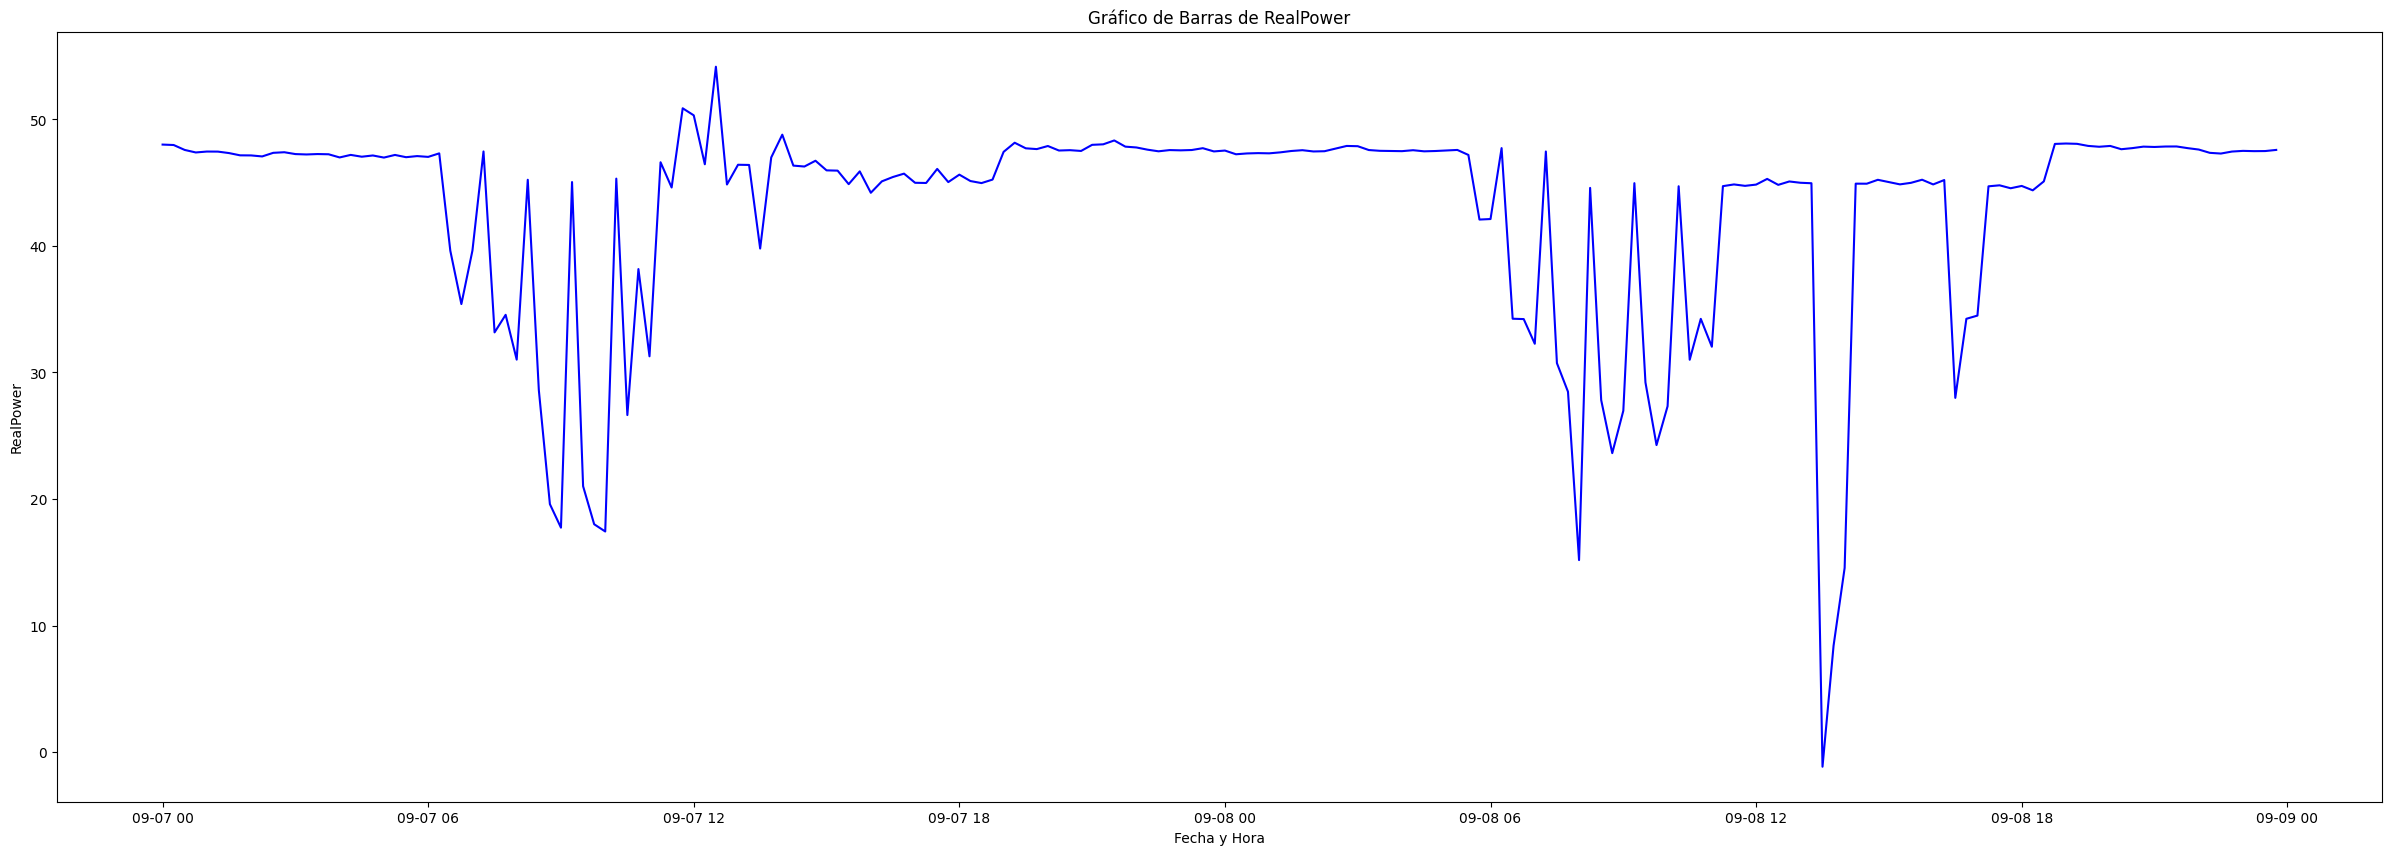

In [417]:
df_2019_sep_min2=pd.DataFrame()

for i in range(len(df_2019_sep)):
    if 2111< i <= 2303:
        df_2019_sep_min2 = pd.concat([df_2019_sep_min2, df_2019_sep.iloc[[i]]])

plt.figure(figsize=(30, 10))
plt.plot(df_2019_sep_min2['DateTime'], df_2019_sep_min2['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**Día cualquiera**

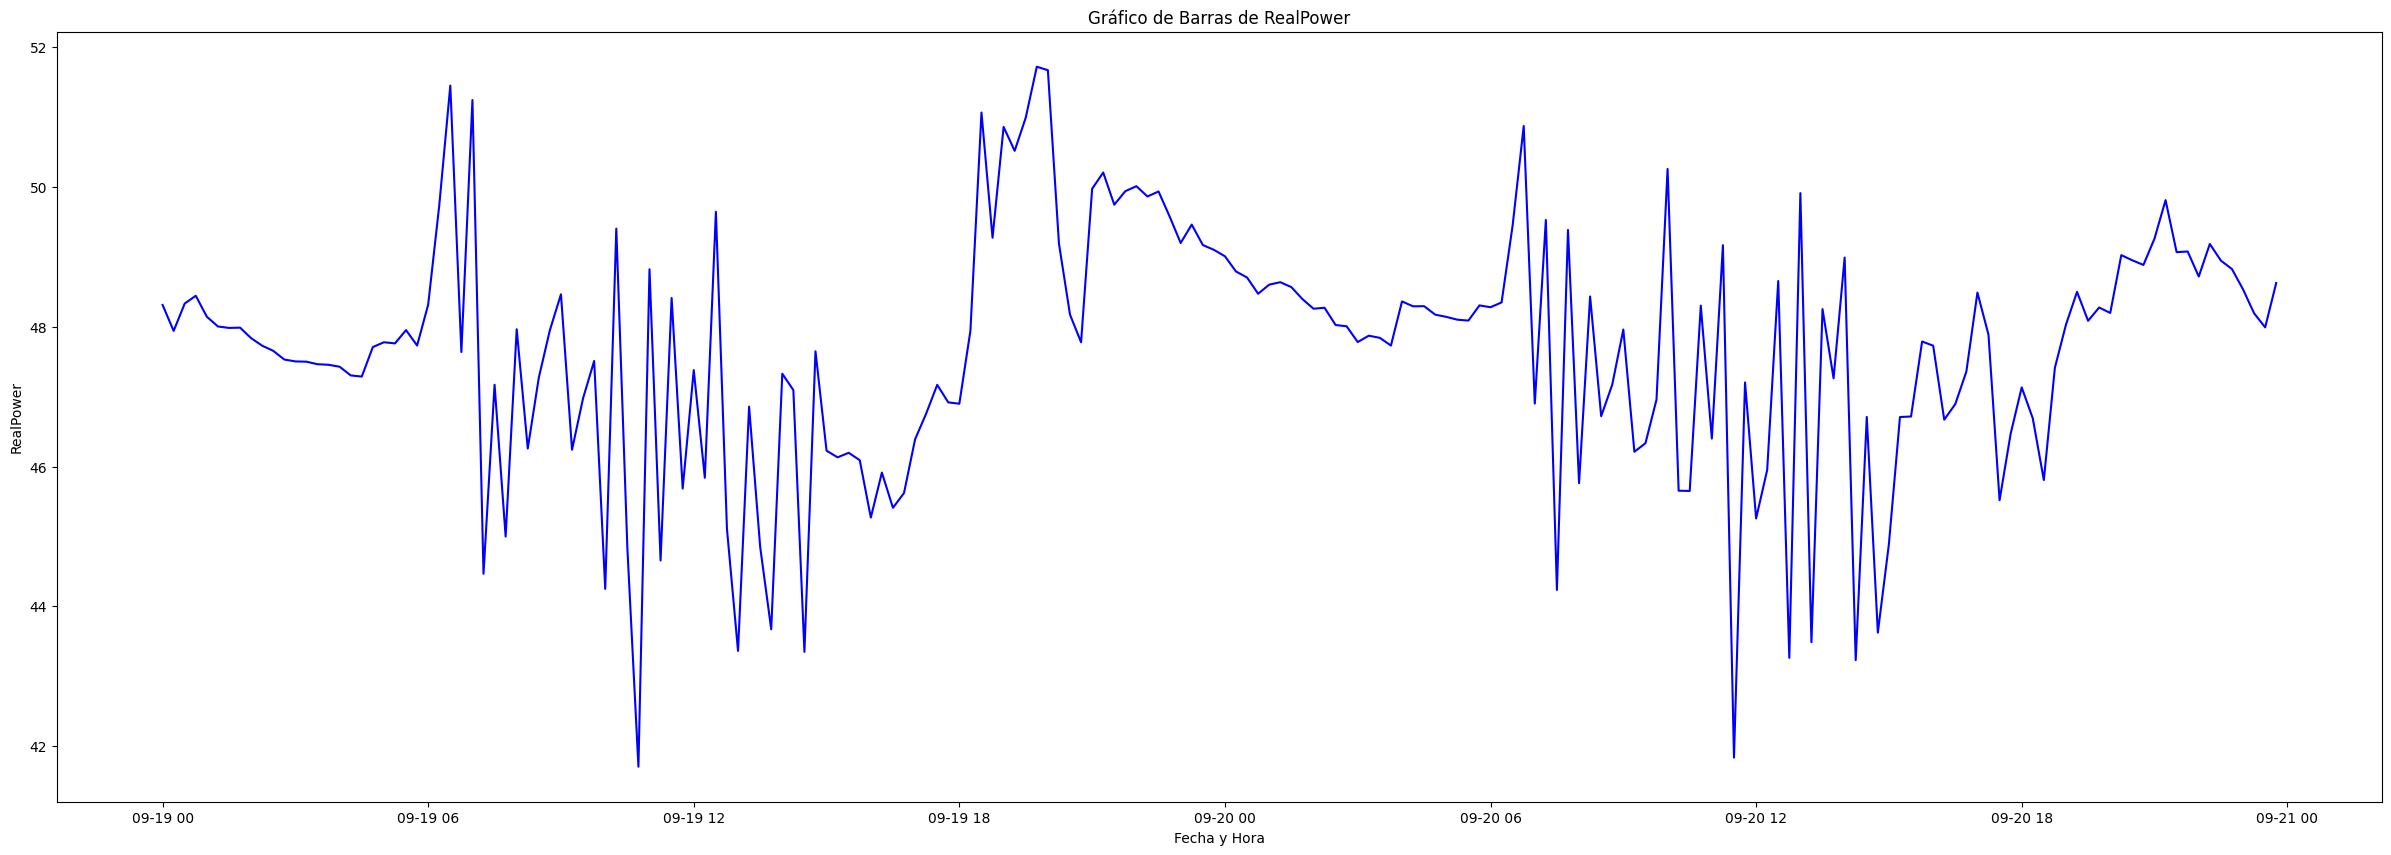

In [418]:
df_2019_sep_min2=pd.DataFrame()

for i in range(len(df_2019_sep)):
    if 959< i <= 1151:
        df_2019_sep_min2 = pd.concat([df_2019_sep_min2, df_2019_sep.iloc[[i]]])

plt.figure(figsize=(30, 10))
plt.plot(df_2019_sep_min2['DateTime'], df_2019_sep_min2['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

**Eliminar valores atípicos**

In [419]:
for i, value in enumerate(df["RealPower"]): 
    if value < 20:
        print(df["DateTime"].iloc[i])

2019-11-13 08:45:00
2019-11-13 08:30:00
2019-09-08 14:00:00
2019-09-08 13:45:00
2019-09-08 13:30:00
2019-09-08 08:00:00
2019-09-07 10:00:00
2019-09-07 09:45:00
2019-09-07 09:00:00
2019-09-07 08:45:00
2019-09-02 10:45:00
2019-09-02 09:00:00
2019-09-02 08:45:00
2019-09-01 10:45:00
2019-09-01 09:30:00
2019-09-01 09:00:00
2019-09-01 08:45:00
2019-07-21 09:00:00
2019-07-21 08:00:00


Text(0, 0.5, 'RealPower')

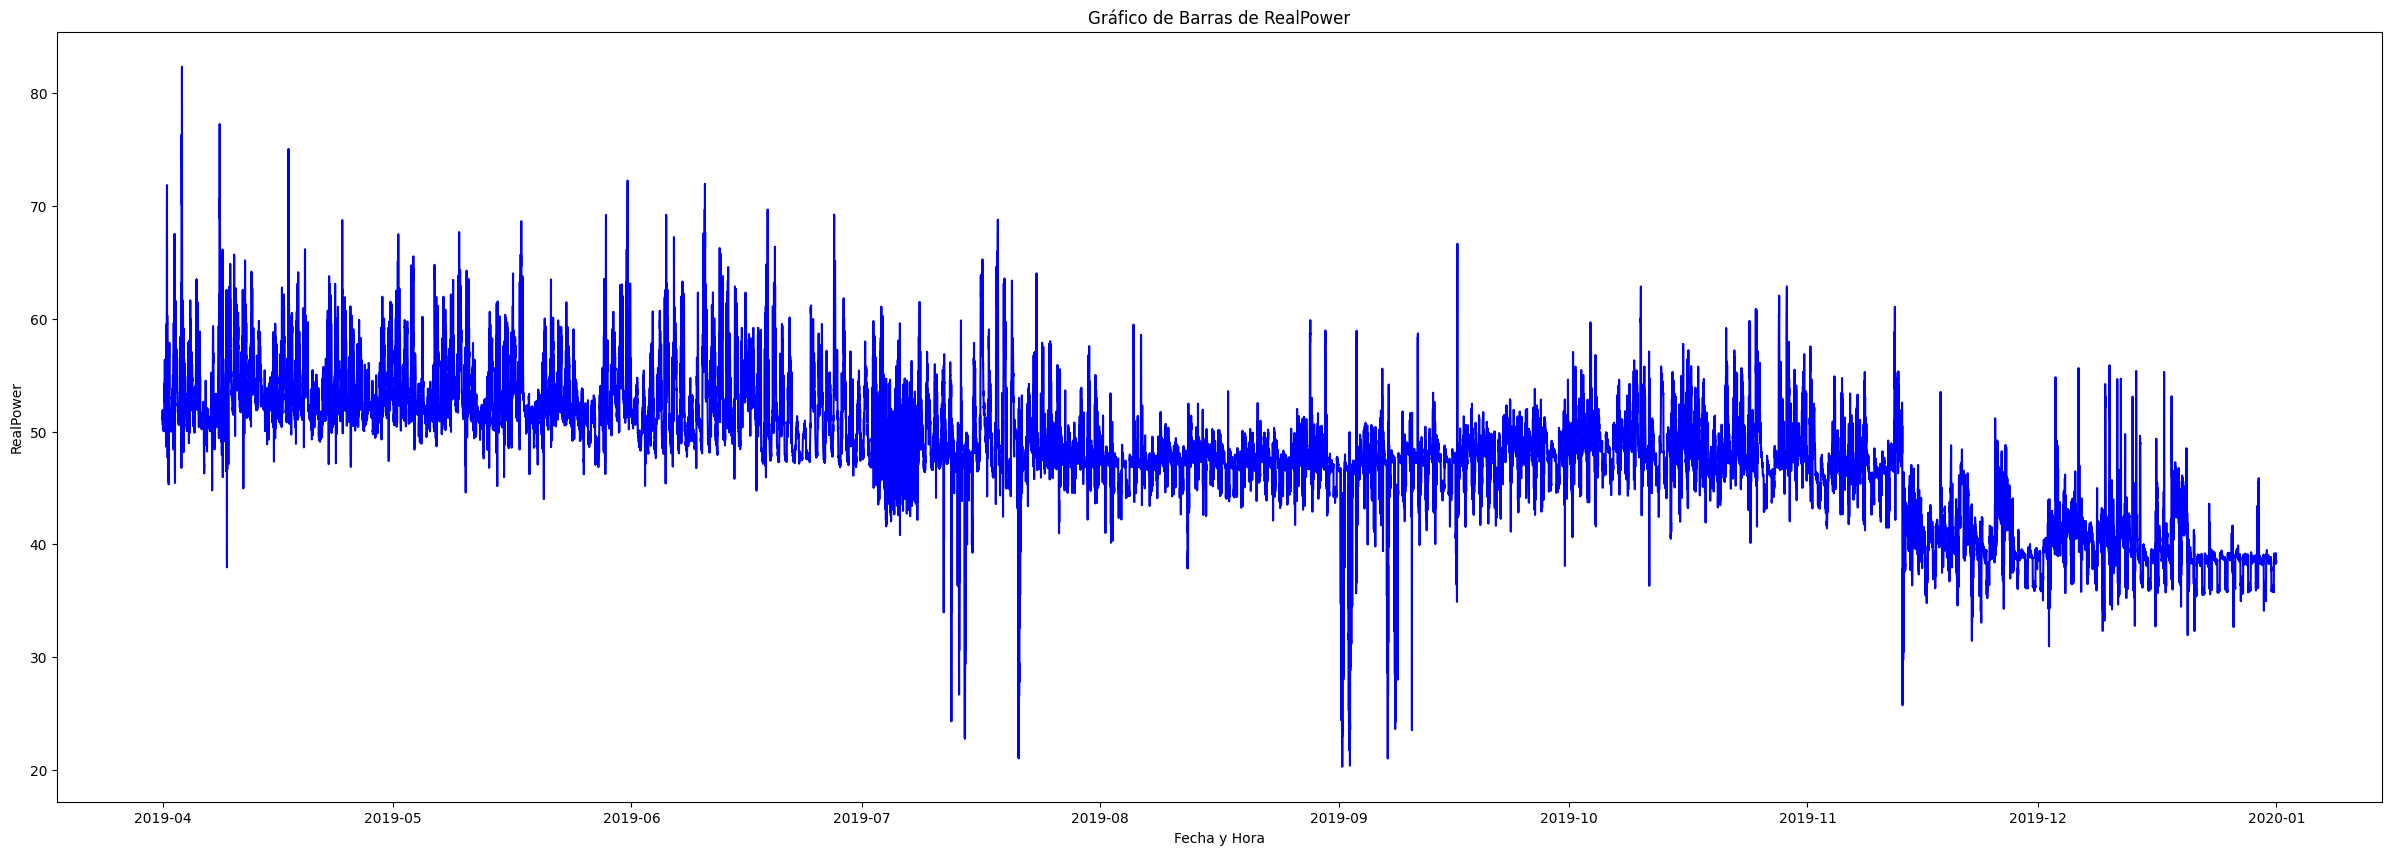

In [420]:
df = df[df['RealPower'] > 20]

plt.figure(figsize=(30, 10))
plt.plot(df['DateTime'], df['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

Error absoluto medio: 4.174674352352969
Error cuadrático medio: 31.51743927533253
Raíz cuadrada del error cuadrático medio: 5.614039479317235


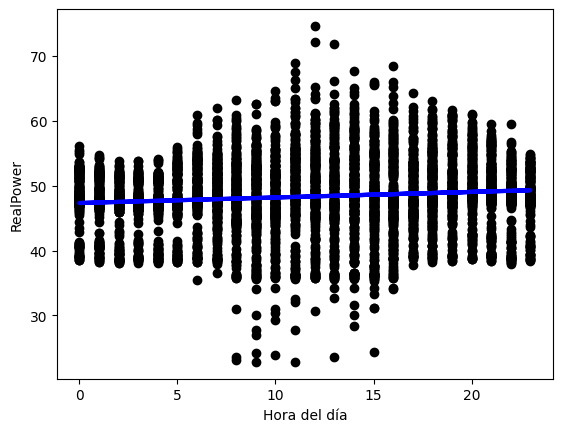

In [421]:

df['Hour'] = df['DateTime'].dt.hour
X = df[['Hour']]
y = df['RealPower']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz cuadrada del error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred, squared=False))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Hora del día')
plt.ylabel('RealPower')
plt.show()

**Adding EV**

In [422]:
data2=pd.read_csv("UCSD-Microgrid-Database\Data Files\BuildingLoadWithEV\HopkinsEV.csv")

data2

,DateTime,RealPower
0,1/1/2020 0:00,0.0
1,12/31/2019 23:45,0.0
2,12/31/2019 23:30,0.0
3,12/31/2019 23:15,0.0
4,12/31/2019 23:00,0.0
...,...,...
26396,4/1/2019 1:00,0.0
26397,4/1/2019 0:45,0.0
26398,4/1/2019 0:30,0.0
26399,4/1/2019 0:15,0.0


Text(0, 0.5, 'RealPower')

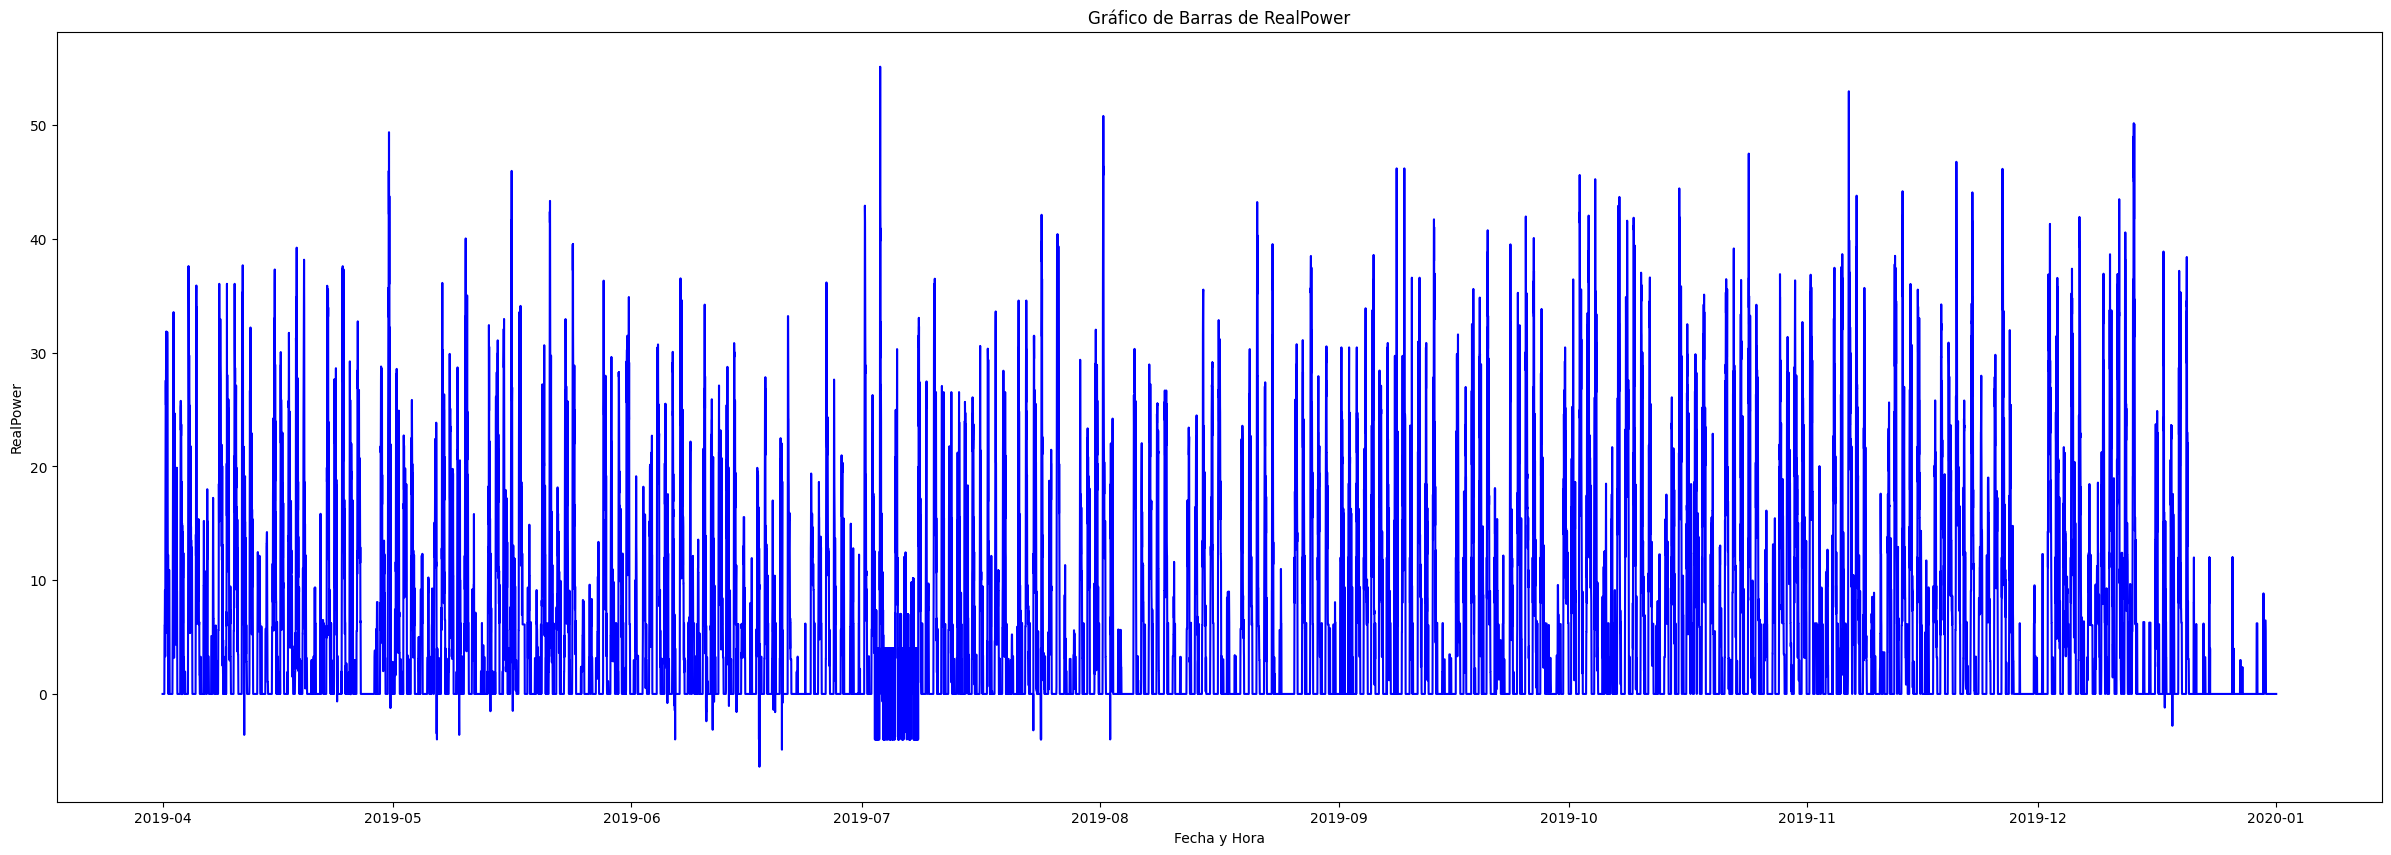

In [423]:
data2["DateTime"]=pd.to_datetime(data2["DateTime"])

plt.figure(figsize=(30, 10))
plt.plot(data2['DateTime'], data2['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

Text(0, 0.5, 'RealPower')

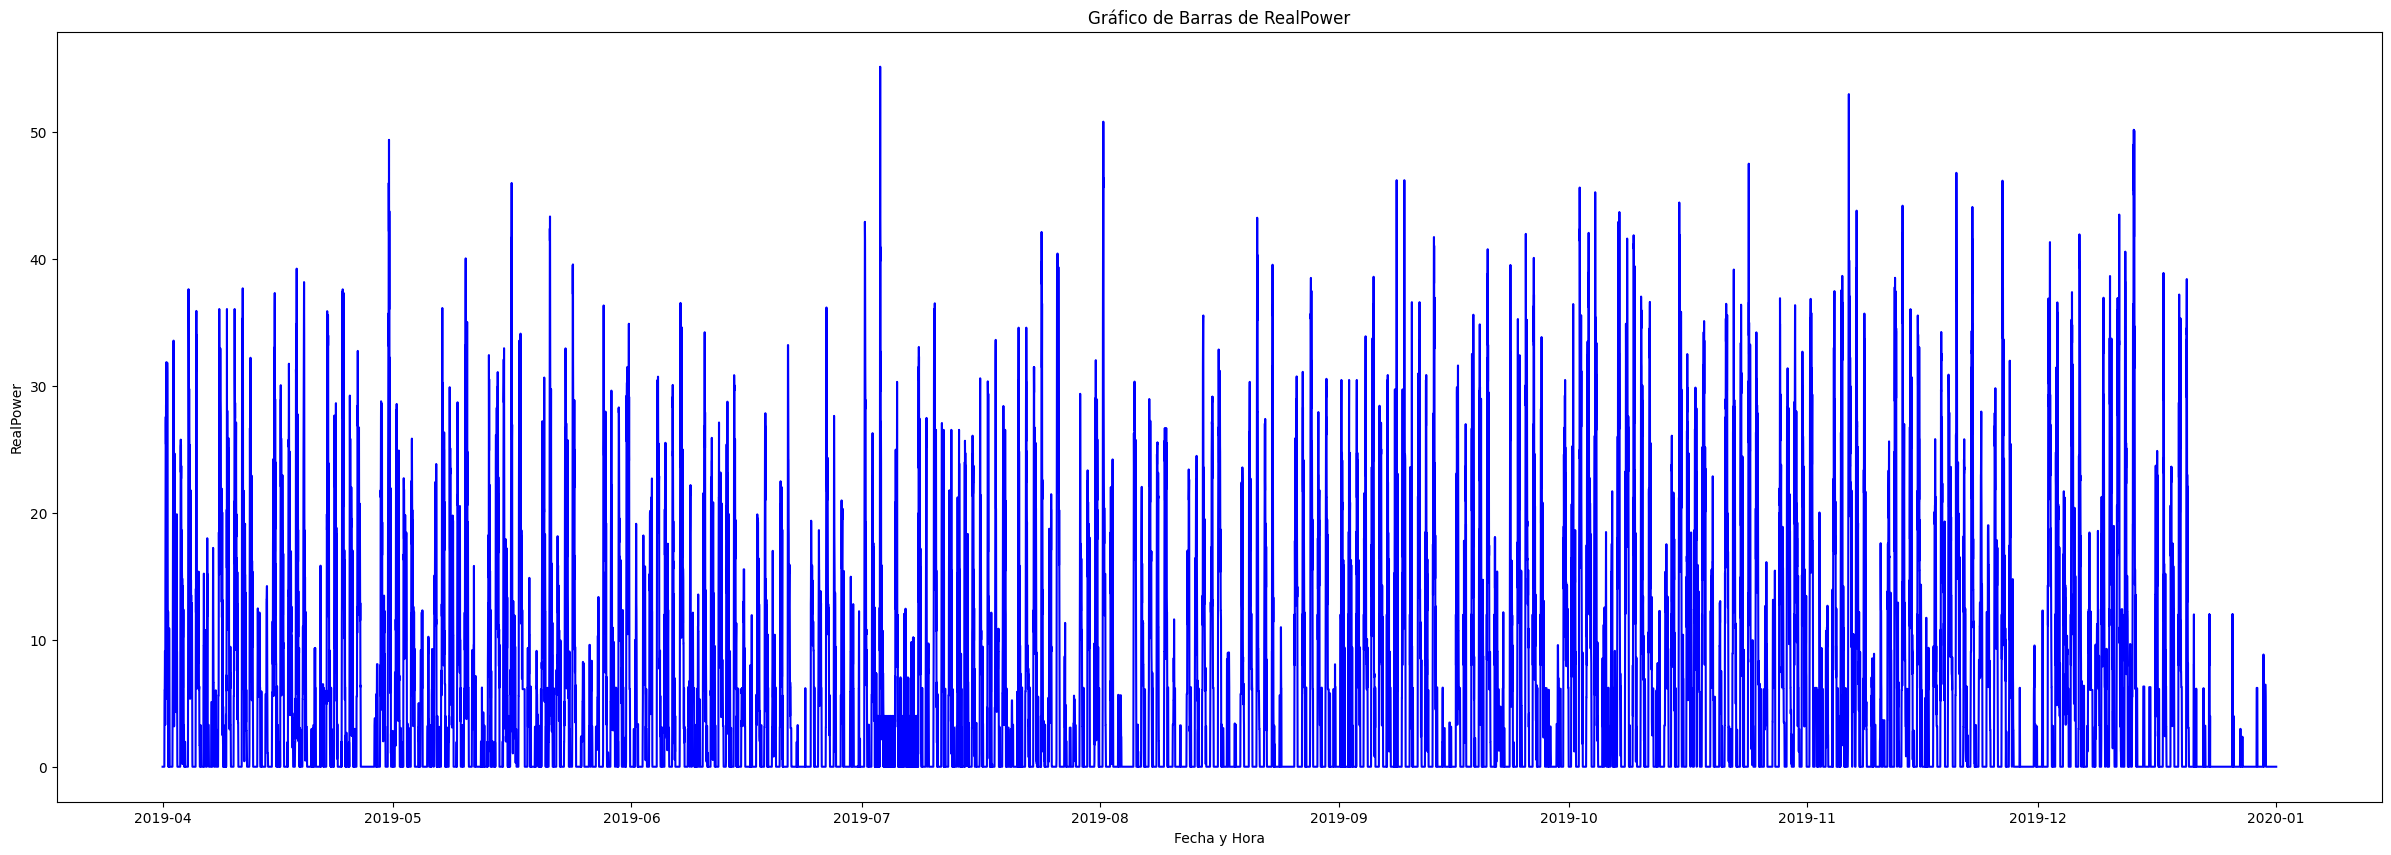

In [424]:
data2 = data2[data2['RealPower'] >= 0]

plt.figure(figsize=(30, 10))
plt.plot(data2['DateTime'], data2['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

Error absoluto medio: 7.031275853241232
Error cuadrático medio: 83.27815048830148
Raíz cuadrada del error cuadrático medio: 9.125686302317293


C:\Users\giuliana\AppData\Local\Temp\ipykernel_25892\3711028002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Hour'] = data2['DateTime'].dt.hour


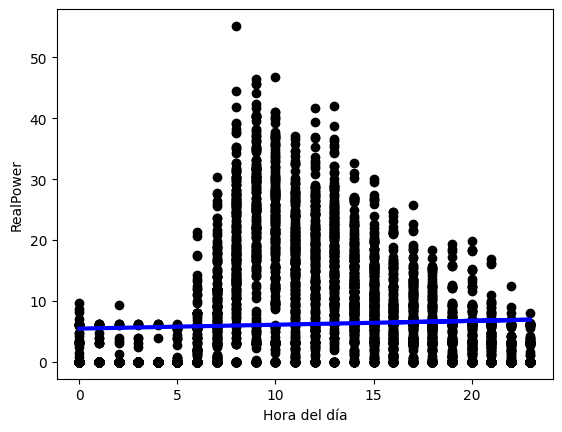

In [425]:
data2['Hour'] = data2['DateTime'].dt.hour
X = data2[['Hour']]
y = data2['RealPower']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz cuadrada del error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred, squared=False))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Hora del día')
plt.ylabel('RealPower')
plt.show()

¿Cuánto los autos han cargado? en promedio c

In [426]:
df = df.rename(columns={'RealPower': 'Power Building'})
data2 = data2.rename(columns={'RealPower': 'Power EV'})

del df["Hour"]
del data2["Hour"]

df_merged = pd.merge(df, data2, on='DateTime', how='inner')

df_merged

,DateTime,Power Building,Power EV
0,2019-12-31 23:45:00,38.394,0.0
1,2019-12-31 23:30:00,38.619,0.0
2,2019-12-31 23:15:00,38.577,0.0
3,2019-12-31 23:00:00,38.493,0.0
4,2019-12-31 22:45:00,38.313,0.0
...,...,...,...
26262,2019-04-01 01:00:00,51.912,0.0
26263,2019-04-01 00:45:00,50.980,0.0
26264,2019-04-01 00:30:00,51.873,0.0
26265,2019-04-01 00:15:00,51.186,0.0


In [427]:
#df_merged['Timestamp'] = df_merged['DateTime'].apply(lambda x: x.timestamp())

#del df_merged["DateTime"]

In [428]:
df_merged['day'] = df_merged['DateTime'].dt.day
df_merged['Hour'] = df_merged['DateTime'].dt.hour
df_merged['month'] = df_merged['DateTime'].dt.month
df_merged['minute'] = df_merged['DateTime'].dt.minute


In [429]:
correlation_matrix = df_merged[['Power Building', 'day', 'Hour', 'month', 'minute']].corr()

print(correlation_matrix)

                Power Building       day      Hour     month    minute
Power Building        1.000000 -0.084092  0.103744 -0.736741 -0.005187
day                  -0.084092  1.000000  0.000740  0.003550  0.000540
Hour                  0.103744  0.000740  1.000000  0.000775  0.000235
month                -0.736741  0.003550  0.000775  1.000000 -0.000018
minute               -0.005187  0.000540  0.000235 -0.000018  1.000000


In [430]:
correlation_matrix = df_merged[['Power EV',  'day', 'Hour', 'month', 'minute']].corr()

print(correlation_matrix)

          Power EV       day      Hour     month    minute
Power EV  1.000000 -0.070838  0.048371  0.013258  0.001269
day      -0.070838  1.000000  0.000740  0.003550  0.000540
Hour      0.048371  0.000740  1.000000  0.000775  0.000235
month     0.013258  0.003550  0.000775  1.000000 -0.000018
minute    0.001269  0.000540  0.000235 -0.000018  1.000000


In [433]:
del df_merged["DateTime"]
del df_merged["Power EV"]


In [435]:
from sklearn.cluster import KMeans


data = df_merged.values
inertia = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(data)
    inertia.append(k_means.inertia_)


C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

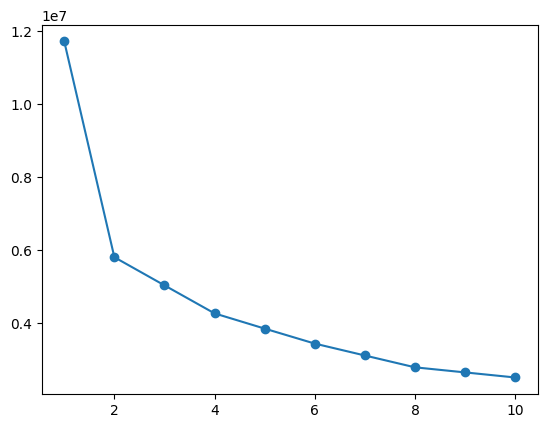

In [436]:
plt.plot(range(1,11), inertia, marker="o")

In [439]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
pca = PCA(5)
 
#Transform the data
df = pca.fit_transform(data)
df.shape
print(data)
print(df)

[[38.394 31.    23.    12.    45.   ]
 [38.619 31.    23.    12.    30.   ]
 [38.577 31.    23.    12.    15.   ]
 ...
 [51.873  1.     0.     4.    30.   ]
 [51.186  1.     0.     4.    15.   ]
 [50.676  1.     0.     4.     0.   ]]
[[ 22.53284577 -15.96571247  -8.80705347 -11.98409915  -0.17339406]
 [  7.53243161 -15.9537156   -8.85901217 -11.8094667   -0.24310809]
 [ -7.46745449 -15.96695794  -8.84180136 -11.87374531  -0.21907364]
 ...
 [  7.49073493  15.02440224  10.42659027   6.35697257   2.41565384]
 [ -7.50787554  14.95018877  10.61089601   5.71554923   2.66615936]
 [-22.50683606  14.8927069   10.7493478    5.23250513   2.854517  ]]


C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


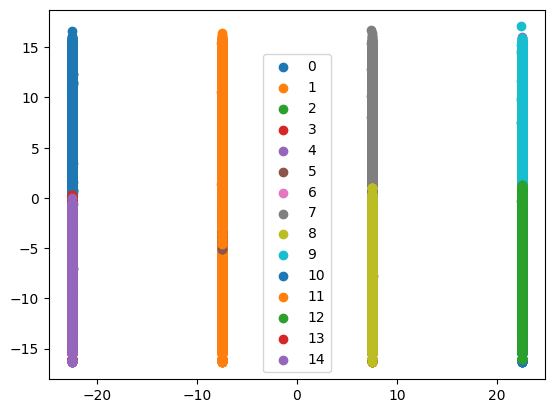

In [440]:
k_means = KMeans(n_clusters=15)

#predict the labels of clusters.
label = k_means.fit_predict(df)
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [442]:
df_merged

,Power Building,day,Hour,month,minute
0,38.394,31,23,12,45
1,38.619,31,23,12,30
2,38.577,31,23,12,15
3,38.493,31,23,12,0
4,38.313,31,22,12,45
...,...,...,...,...,...
26262,51.912,1,1,4,0
26263,50.980,1,0,4,45
26264,51.873,1,0,4,30
26265,51.186,1,0,4,15


In [447]:
from scipy.stats import f_oneway

# Ejemplo de ANOVA
result = f_oneway(df_merged["Power Building"],  df_merged["Hour"])

print("Estadística F:", result.statistic)
print("Valor p:", result.pvalue)

# Interpretar los resultados
if result.pvalue < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay evidencia suficiente para afirmar que hay diferencias significativas entre los grupos.")

Estadística F: 446487.88918683445
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.


In [448]:
from scipy.stats import f_oneway

# Ejemplo de ANOVA
result = f_oneway(df_merged["Power Building"],  df_merged["minute"])

print("Estadística F:", result.statistic)
print("Valor p:", result.pvalue)

# Interpretar los resultados
if result.pvalue < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay evidencia suficiente para afirmar que hay diferencias significativas entre los grupos.")

Estadística F: 55985.72538437743
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.


In [449]:
from scipy.stats import f_oneway

# Ejemplo de ANOVA
result = f_oneway(df_merged["Power Building"],  df_merged["month"])

print("Estadística F:", result.statistic)
print("Valor p:", result.pvalue)

# Interpretar los resultados
if result.pvalue < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay evidencia suficiente para afirmar que hay diferencias significativas entre los grupos.")

Estadística F: 1108041.4619811508
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.


In [450]:
from scipy.stats import f_oneway

# Ejemplo de ANOVA
result = f_oneway(df_merged["Power Building"],  df_merged["day"])

print("Estadística F:", result.statistic)
print("Valor p:", result.pvalue)

# Interpretar los resultados
if result.pvalue < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay evidencia suficiente para afirmar que hay diferencias significativas entre los grupos.")

Estadística F: 253256.96814988114
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.


In [452]:
df_merged.to_csv('df_merged.csv', index=False)
